<a href="https://colab.research.google.com/github/fcastellanosp/MINE-4206_202410_AML/blob/main/Laboratorios/Laboratorio%202/Sesión%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

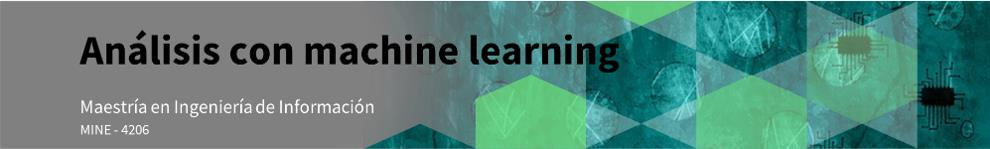

#Tabla de contenido

[Contexto y objetivos.](scrollTo=opGTmPf8s2Fw)<br>
[Entendimiento del negocio.](#scrollTo=mvUzsZbk4y-4)<br>
[0. Instalación de librerías.](#scrollTo=gjQDyeHN5Lib)<br>
[1. Importar librerías](#scrollTo=KXlOoHGx6Fdz)<br>
[2. Introducción a los datos.](#scrollTo=6OKhZATq6Jlt)<br>
[3. Modelamiento.](#scrollTo=fy59XxXphe_L)<br>
[4. Preguntas.](#scrollTo=npdolSB5h7np)<br>

---
# Contexto y objetivos.

El sector de hotelería y alquileres se destaca por su alta competitividad, donde las evaluaciones de los usuarios son cruciales para elevar la calidad de los servicios ofrecidos. Estos comentarios pueden ser obtenidos a través de la plataforma de la empresa, como es el caso de AirBnb. Asimismo, estas plataformas proporcionan a los clientes información vital para tomar decisiones informadas sobre sus alquileres, tales como detalles sobre servicios de limpieza, capacidad de alojamiento, información del anfitrión, entre otros aspectos relevantes.

El objetivo principal es desarrollar un modelo predictivo capaz de determinar el nivel de satisfacción. Esto permitirá al hotel tomar medidas proactivas, como ofrecer incentivos a los anfitriones y a los usuarios, o gestionar de manera más eficiente la disponibilidad de la oferta.

**Objetivos:**

* Resolver un problema de Aprendizaje de Datos.
* Revisar los conceptos básicos de una clasificación.
* Comprender el comportamiento de los clientes e identificar oportunidades de mejora.

La fuente de los datos la puedes encontrar en [Airbnb price Dataset](https://www.kaggle.com/datasets/rupindersinghrana/airbnb-price-dataset).



# Entendimiento del negocio.

Para tener un mejor detalle sobre el comportamiento de las variables, solicitamos a la organización el diccionario de datos y nos suministró la siguiente información:

| ATRIBUTO | DEFINICIÓN |
| :- | :- |
| **id** | Corresponde al identificador.|
| **log_price** | Representa el precio de alquiler en escala logarítmica.|
| **property_type** | Esta variable representa el tipo de propiedad, cuenta con valores como `Apartment` y `House`.|
| **room_type** | Representa el tipo de habitación y tiene un total de 3 categorías. `Shared room`, `Entire home/apt` y `Private room`.|
| **amenities** | Representa las comodidades, los datos presentan una selección de valores de acuerdo con lo ofrecido en el arrendamiento.|
| **accommodates** | Representa el número máximo de huéspedes.|
| **bathrooms** | Representa el número de baños ofrecidos en el arrendamiento.|
| **bed_type** | Representa el tipo de habitación, cuenta con un total de 5 categorías `Real Bed`, `Futon`, `Pull-out-Sofa`, `Airbed` y `Couch`.|
| **cancellation_policy** | Representa la política de cancelación, con los valores `strict`, `flexible`, `moderate`, `super_strict_30` y `super_strict_60`.|
| **cleaning_fee** | Representa la política de limpieza, presenta categorías con valores `True` y `False` |
| **city** | Representa el nombre de las ciudades dónde se presta el servicio.|
| **description** | Representa la descripción del sitio con el servicio prestado. |
| **first_review** | Representa la fecha de la primera calificación.|
| **host_has_profile_pic** | Representa si el dueño del servicio tiene o no foto de perfil. |
| **host_identity_verified** | Representa si la identidad del dueño ha sido verificada, presenta categorías con valores `True` y `False`.|
| **host_response_rate** | Representa la tasa de respuesta por parte del dueño del servicio.|
| **host_since** | Representa la fecha desde que el dueño presta el servicio.|
| **instant_bookable** | Esta variable representa si permite reservar de forma rápida o instantánea, presenta categorías con valores `True` y `False`.|
| **last_review** | Representa la fecha de la última calificación.|
| **latitude** | Representa la coordenada geográfica asociada a la latitud. |
| **longitude** | Representa la coordenada geográfica asociada a la longitud. |
| **name** | Representa el nombre del sitio a rentar. |
| **neighbourhood** | Representa el valor asociado al vecindario del sitio de prestación del servicio. |
| **number_of_reviews** | Representa el número de calificaciones registradas. |
| **review_scores_rating** | Representa el puntaje de las calificaciones con rango de 0 a 100. |
| **thumbnail_url** | Representa la dirección url de la previsualización del sitio en la aplicación. |
| **zipcode** | Representa el código postal de la prestación del servicio. |
| **bedrooms** | Representa el número de habitaciones. |
| **beds** | Corresponde al número de camas ofrecidas en el servicio. |

---
# 0. Instalación de librerías.

Análisis profundo de datos

In [1]:
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 61.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=8169ff065b5651faffa33595db903521982db58dd9cafb6b2b50a9f2df9671b7
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


Entendiendo que la organización publicó la información en kaggle, requerimos hacer uso de la librería para acceder a la información.

In [2]:
!pip install kaggle

---
# 1. Importar librerías

In [3]:
#Manejo de datos
import pandas as pd
import numpy as np

#Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Analisis profundo de datos
from ydata_profiling import ProfileReport

#Entrenamiento del modelo
import sklearn
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, SelectPercentile
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, FunctionTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import plot_tree
from sklearn.svm import SVC

from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.metrics import classification_report, confusion_matrix, PrecisionRecallDisplay

#Librerías extras
import itertools

from datetime import datetime

print(f"La versión de sklearn es: {sklearn.__version__}")

La versión de sklearn es: 1.2.2


---
# 2. Introducción a los datos.

##2.1. Parámetros generales y carga de la información.

In [4]:
#Porcentaje para validación y test
test_val_alpha = 0.2
#random_state o semilla para la reproducibilidad
my_seed = 19

## 2.2. Configuración del entorno de kaggle.

Preparar el archivo de kaggle para la descarga

In [5]:
!ls -lha kaggle.json
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

-rw-r--r-- 1 root root 69 Mar  1 10:10 kaggle.json


Verificamos la conectividad con kaggle, usando un comando para ver una previsualización de datasets:

In [6]:
!kaggle datasets list

ref                                                     title                                          size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------  --------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
syedanwarafridi/vehicle-sales-data                      Vehicle Sales Data                             19MB  2024-02-21 20:16:17           4542         73  1.0              
nelgiriyewithana/apple-quality                          Apple Quality                                 170KB  2024-01-11 14:31:07          24017        518  1.0              
kanchana1990/spotifys-long-hits-2014-2024               Spotify's Long Hits (2014-2024) 🎶              38KB  2024-02-23 12:39:02           1700         44  1.0              
xontoloyo/data-penjualan-zara                           ZARA Sales                                     17KB  2024-02-27 05:37:53  

Una vez hemos asegurado la conectividad, procedemos a realizar el proceso de descarga de la información del negocio.

In [7]:
!kaggle datasets download rupindersinghrana/airbnb-price-dataset

 74% 23.0M/31.3M [00:00<00:00, 59.9MB/s]
100% 31.3M/31.3M [00:00<00:00, 75.1MB/s]


La información descargada en formato zip, cuenta con un archivo csv en su interior, si vieramos de forma gráfica su estructura, sería la siguiente:

```python
airbnb-price-dataset.zip/
  Airbnb_Data.csv
```

Teniendo en cuenta lo anterior, vamos a descomprimir la información, es necesario crear un un directorio para que el contenido del archivo zip, se encuentre allí. Para este propósito, vamos a crear unas variables de manejo de archivos:

In [8]:
ROOT_DIR = '/content'
DATASET_NAME = 'airbnb-price-dataset'
DATASET_FILE = "Airbnb_Data.csv"

Vamos ahora a generar una previsualización del comando de descompresión del archivo zip:

In [9]:
print(f"!unzip {DATASET_NAME}.zip -d {ROOT_DIR}/{DATASET_NAME}")

!unzip airbnb-price-dataset.zip -d /content/airbnb-price-dataset


Ahora si vamos a consolidar el bloque de comandos con todos los pasos para la descompresión del archivo zip:

In [10]:
%cd {ROOT_DIR}
!mkdir /{DATASET_NAME}
!unzip {DATASET_NAME}.zip -d {ROOT_DIR}/{DATASET_NAME}

/content
Archive:  airbnb-price-dataset.zip
  inflating: /content/airbnb-price-dataset/Airbnb_Data.csv  


Generamos la ruta del archivo csv para carga al Pandas Dataframe:

In [11]:
DATA_DIR = f"{ROOT_DIR}/{DATASET_NAME}/{DATASET_FILE}"
print(DATA_DIR)

/content/airbnb-price-dataset/Airbnb_Data.csv


In [12]:
data_df = pd.read_csv(DATA_DIR)

Generamos una previsualización de la información:

In [13]:
data_df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


Verificamos el número de instancias y características:

In [14]:
print(f"Dimensión: El número de instancias es: {data_df.shape[0]:,}, el número de características (features) es: {data_df.shape[1]}")

Dimensión: El número de instancias es: 74,111, el número de características (features) es: 29


## 2.3. Separación de la información.

### 2.3.1. Entrenamiento y test.

Definimos la variable objetivo:

In [15]:
target_feature = 'review_scores_rating'

Separamos los datos de entrenamiento y test (20%), junto con el parámetro de reproducibilidad o semilla (`random_state`):

In [16]:
train, test = train_test_split(data_df, test_size=test_val_alpha, random_state=my_seed)
train.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
22995,12930098,4.219508,House,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",5,2.0,Real Bed,flexible,False,...,40.769282,-73.832161,温馨浪漫之家,Flushing,9,96.0,https://a0.muscache.com/im/pictures/e1a66375-5...,11354,3.0,5.0
58367,11013337,4.787492,Apartment,Private room,"{TV,""Wireless Internet"",Kitchen,Heating,Washer...",2,1.0,Real Bed,moderate,True,...,42.342865,-71.095775,Cozy room minutes away from Fenway Park,Fenway/Kenmore,0,NaN,https://a0.muscache.com/im/pictures/bb6309bf-7...,02215,1.0,1.0
3702,19611520,5.652489,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",16,3.5,Real Bed,strict,True,...,38.949613,-77.022647,Entire Rustic Rowhouse - Metro/Bus to Sites,Petworth,10,98.0,https://a0.muscache.com/im/pictures/61218764/b...,20011,4.0,8.0
28025,12732885,4.700480,Townhouse,Private room,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,moderate,True,...,41.898211,-87.669621,Private bed&bath in Ukrainian Vlg.,Ukrainian Village,49,96.0,https://a0.muscache.com/im/pictures/84419673/2...,60622,1.0,1.0
70881,3924206,4.369448,House,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,moderate,True,...,34.115006,-118.259556,Artistic Urban Farm Retreat,NaN,25,96.0,https://a0.muscache.com/im/pictures/65754658/8...,90039,1.0,1.0


### 2.3.2. Validación.

In [17]:
new_train, val = train_test_split(train, test_size=test_val_alpha, random_state=my_seed)
new_train.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
3489,14953804,4.700480,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",5,1.0,Real Bed,moderate,True,...,40.851767,-73.936516,Sunny 1 bedroom right next to express A!,Washington Heights,7,92.0,https://a0.muscache.com/im/pictures/9d1269c7-3...,10033,1.0,2.0
5210,18508862,5.068904,Condominium,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,flexible,False,...,34.047637,-118.463873,Modern Private Brentwood Bed/Bath,Brentwood,121,99.0,https://a0.muscache.com/im/pictures/1345f828-b...,90049,1.0,1.0
27823,11948037,5.298317,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",4,1.0,Real Bed,flexible,False,...,40.712492,-73.995732,Entire beautiful 2 bedroom apartment,Chinatown,0,NaN,https://a0.muscache.com/im/pictures/eb8d3182-6...,10002,2.0,2.0
50481,19927810,5.298317,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,1.0,Real Bed,strict,True,...,41.949271,-87.646695,Elegant Vintage Lakefront Condo near Wrigley F...,Lakeview,34,98.0,https://a0.muscache.com/im/pictures/94683234/9...,60657,1.0,1.0
48276,18293768,4.867534,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,1.0,Real Bed,flexible,True,...,40.664782,-73.989441,Charming Studio in Park Slope,Park Slope,19,97.0,https://a0.muscache.com/im/pictures/61ffccb6-f...,11215,1.0,1.0


Demos un vistazo al número de instancias para cada uno de los conjuntos de datos:

In [18]:
train_count = new_train.shape[0]
val_count = val.shape[0]
test_count = test.shape[0]

print("-------------------SEPARACIÓN DE LA INFORMACIÓN-------------------")
print(f"-> Train: {train_count:,}")
print(f"-> Validation: {val_count:,}")
print(f"-> Test: {test_count:,}")

-------------------SEPARACIÓN DE LA INFORMACIÓN-------------------
-> Train: 47,430
-> Validation: 11,858
-> Test: 14,823


## 2.4. Exploración de los datos.

In [19]:
ProfileReport(new_train)

Output hidden; open in https://colab.research.google.com to view.

## 2.5. Insights obtenidos de la información.

Los datos tienen un total de 29 variables o características, un total de 47.430 instancias. No tiene instancias (filas) duplicadas.
Los tipos de datos para las variables se distribuyen de la siguiente forma:
* 10 numéricas.
* 5 categóricas.
* 7 de texto.
* 4 booleanas (verdadero y falso).
* 3 de fecha.


Las recomendaciones de tratamiento de la información para cada una de las características, son las siguientes:

|ATRIBUTO | PROPUESTA |
|---| :- |
| **id** | Se recomienda eliminar esta característica.|
| **property_type** | Cuenta con relativa cardinalidad alta, con un total de 34 categorías (`valores únicos`) e no balanceadas, teniendo en cuenta que `Apartment` y `House` predominan con algo más de 84% de la información. No presenta ausencias. Se recomienda mantener únicamente 3 categorías: `Apartment`, `House` y `Others`.|
| **room_type** | Tiene un total de 3 categorías. 'Shared room' es la más baja con el 2.9%. Se recomienda mantener estas 3 categorías y preguntar a la organización si es suficiente la información del atributo anterior.|
| **amenities** | Se recomienda crear nuevas características con las facilidades más comunes: TV, Internet, Pet friendly, Kid Friendly. No presenta ausencias. Se recomienda preguntar a la organización si es suficiente la información del atributo anterior; sin embargo, para este propósito se recomienda eliminar esta característica.|
| **accommodates** | Tiene alta correlación y los valores oscilan entre 1 y 16, con alta concentración de los que van desde 1 hasta 4. La categoría 2 representa el 42.7% de los datos, mientras que 1, 3 y 4 representan en 39.7% de los datos.  No presenta ausencias.|
| **bathrooms** | Sus valores que oscilan entre 1 y 8, con mayor concentración de 1 baño. Cuenta con 130 (0.3%) valores con cero, se recomienda preguntar a la organización si estos valores deben ser tenidos en cuenta o si son eliminados. Cuenta con 115 valores ausentes que representan el 0.2% de la información, se recomienda eliminar estos valores.|
| **bed_type** | Cuenta con un total de 5 categorías no balanceadas, dado que la mayor concentración se encuentra en `Real Bed`. No tiene ausencias. Se recomienda tener un tratamiento que mantenga las 5 categorías y agregar una categoría `Others` para otro valor distinto.|
| **cancellation_policy** | Presenta 5 categorías con alta concentración en los valores `strict`, `flexible` y `moderate`. Se recomienda para las categorías `super_strict_30` y `super_strict_60` como una única variable `super_strict`. No presenta ausencias. Se recomienda preguntar a la organización si es suficiente la información del atributo.|
| **cleaning_fee** | Presenta categorías con valores True y False, no se encuentran balanceados dado que True cuenta con un 73.4% de la información, mientras que el 26.6%. No presenta ausencias. Se recomienda transformar a valores numéricas 0 y 1.|
| **city** | Presenta 6 categorías no balanceadas y con mayor concentración en `NYC`, y `LA`, las cuáles suman un 74%. No presenta ausencias. Contamos con la información geográfica con las coordenadas de latitud y longitud, para un modelo avanzado, podría aplicarse una validación y limpieza en la que las coordenadas correspondan con la ciudad (intersección geográfica).|
| **description** | Cuenta con 47.180 valores únicos que representan un 99.5%. No presenta ausencias. |
| **first_review** | Cuenta con 2400 valores únicos que representan un 6.4% de los datos, tiene 10.130 valores ausentes que corresponden a un 21.4% de los datos. Se recomienda eliminar esta característica.|
| **host_has_profile_pic** | La variable no está balanceada, para el valor True cuenta con un 99.4% y False con un 0.3%. Tiene 122 valores ausentes que representan un 0.3% de los datos. Se recomienda preguntar a la organización si estos valores deben ser tenidos en cuenta o si son eliminados. |
| **host_identity_verified** | Esta variable representa si la identidad del dueño ha sido verificada, la cuál cuenta con las mismas categorías de la variable **host_has_profile_pic**, valores ausentes, así como la misma recomendación de consulta con la organización.|
| **host_response_rate** | Cuenta con 75 categorías que representan un 75.4% de la información. Tiene 11.649 valores ausentes que representan un 24.6% de la información. Se recomienda transformar esta variable a valor numérico y preguntar al negocio si las ausencias pueden ser imputadas con valor cero.|
| **host_since** | Tiene 122 valores ausentes que representan un 0.3% de los datos. Tiene fechas que van desde junio del año 2008 a octubre del año 2017. Este dato de fecha podría representar una tendencia cíclica, se recomienda transformar a valor numérico.|
| **instant_bookable** | Tiene 2 categorías con valor falso y verdadero, las categorías no están balanceadas y el valor False representa el 73.8% de la información. No presenta ausencias.|
| **last_review** | Sus valores oscilan desde enero del año 2009 a octubre del año 2017. Tiene 10.106 valores ausentes que representan el 21.3% de la información.|
| **latitude** | No presenta ausencias.|
| **longitude** | No presenta ausencias.|
| **name** | Se recomienda eliminar esta característica.|
| **neighbourhood** | Cuenta con 601 categorías (alta cardinalidad). Tiene 4.419 valores ausentes que representan el 9.3% de la información. Se recomienda eliminar esta característica.|
| **number_of_reviews** | Cuyos valores oscilan entre 0 y 605. No presenta ausencias. Tiene 10.103 valores ausentes que representan un 21.3% de la información. Se recomienda preguntar a la organización si estos valores cero son representativos.|
| **review_scores_rating** | Sus valores oscilan desde 20 hasta 100. Tiene 10.680 valores ausentes que representan el 22.5% de los datos. Se recomienda preguntar al negocio si las ausencias pueden ser imputadas o eliminadas.|
| **thumbnail_url** | Tiene 5.213 valores ausentes que corresponden al 11% de la información. Para un modelo avanzado, podría aplicarse una validación de direcciones url válidas y formato válido de imagen; sin embargo, para este propósito se recomienda eliminar esta característica.|
| **zipcode** | Cuenta con 607 valores ausentes que representan el 1.3% de la información. Con el contexto y modelos de predicción esperados por el negocio, no sería una característica representativa, se recomienda eliminar esta característica.|
| **bedrooms** | Sus valores oscilan entre 0 y 10, dónde 4.367 valores corresponden a cero y representan un 9.2% de la información. Se recomienda preguntar a la organización si esto es correcto y representativo en el servicio prestado. Tiene 53 valores ausentes que corresponden al 0.1% de la información.|
| **beds** | Sus valores oscilan entre 0 y 18, 3 valores representan valores cero y corresponden a menos del .1% de la información, se recomienda preguntar a la organización si este valor es correcto y representativo en el servicio prestado. Tiene 82 valores ausentes que corresponden al 0.2% de la información.|

## 2.6. Preparación de la información.

Generamos una copia de los conjuntos de datos:

In [20]:
new_train_ = new_train.copy()
new_val_ = val.copy()
new_test_ = test.copy()

De acuerdo con todo el análisis exploratorio, procedemos en primera instancia a definir las características que serán eliminadas y la eliminación de los valores ausentes:

In [21]:
#Características a eliminar
drop_fields = ["id", "city", "description", "first_review", "name", "neighbourhood", "thumbnail_url", "zipcode", "amenities"]

Definimos las columnas para los cuáles imputaremos valores ausentes:

In [22]:
#Columnas con ausencias que deben ser imputadas con valor cero:
zero_val_fields = ["bathrooms"]

Definimos las columnas para las que serán eliminamos los valores ausentes:

In [23]:
#Columnas con ausencias por eliminar
missing_val_fields = ["cleaning_fee", "host_has_profile_pic", "host_identity_verified", "host_since", "last_review", "number_of_reviews", "bedrooms", "beds", "review_scores_rating"]

Definimos las columnas que deben ser transformadas de texto a valor numérico:

In [24]:
#Columnas tipo texto que requieren transformación a número
str_to_num_fields = ["host_response_rate"]

Definimos las variables booleanas a transformar a valor numérico:

In [25]:
#Columnas con valores verdadero o falso que requieren transformación a número
bool_to_num_fields = ["cleaning_fee", "host_has_profile_pic", "host_identity_verified"]

Registramos los valores tipo fecha para validación:

In [26]:
#Columnas con valores tipo fecha
date_to_num_fields = ["last_review", "host_since"]

Generamos funciones para el borrado de las columnas y eliminación de valores ausentes:

In [27]:
#Función de borrado de features no usados
def drop_features(train_, val_, test_, features):
  train_ = train.drop(features, axis=1)
  val_ = val_.drop(features, axis=1)
  test_ = test_.drop(features, axis=1)

  return train_, val_, test_

#Función de borrado de instancias (registros) con ausencias
def drop_missing_values(train_, val_, test_, features):
  for feature in features:
    train_ = train_[train_[feature].isnull() == False]
    val_ = val_[val_[feature].isnull() == False]
    test_ = test_[test_[feature].isnull() == False]

  return train_, val_, test_

In [28]:
#Ejecutamos las funciones de limpieza de la información
new_train_, new_val_, new_test_ = drop_features(new_train_ ,new_val_, new_test_, drop_fields)
new_train_, new_val_, new_test_ = drop_missing_values(new_train_ ,new_val_, new_test_, missing_val_fields)

In [29]:
print(f"El número de características (features) ahora es: {new_train_.shape[1]}")

El número de características (features) ahora es: 20


Valor de referencia para calcular el número de días. Aplicamos el cálculo sobre 2 campos específicamente:

In [30]:
final_date = pd.to_datetime('2017-12-31')
final_date

Timestamp('2017-12-31 00:00:00')

In [31]:
new_train_["host_since"] = pd.to_datetime(new_train_["host_since"])
new_train_["host_since"] = (final_date - new_train_["host_since"]).dt.days
new_train_["last_review"] = pd.to_datetime(new_train_["last_review"])
new_train_["last_review"] = (final_date - new_train_["last_review"]).dt.days

new_train_[["host_since", "last_review"]].head()

,host_since,last_review
22995,383,98
3702,2194,252
28025,952,426
70881,1076,522
63694,1398,420


La variable target vamos a recategorizarla en valores relacionados con satisfacción, los cuáles definiremos en la función:

In [32]:
def number_to_cat(train_, val_, test_, features):
  bins = [0, 60, 80, 90, 95, 100]  # Límites de cada categoría
  labels = ['Very Unsatisfied', 'Unsatisfied', 'Neutral', 'Satisfied', 'Very Satisfied']  # Etiquetas para las categorías
  for feature in features:
    train_[feature] = pd.cut(train_[feature], bins=bins, labels=labels, include_lowest=True)
    val_[feature] = pd.cut(val_[feature], bins=bins, labels=labels, include_lowest=True)
    test_[feature] = pd.cut(test_[feature], bins=bins, labels=labels, include_lowest=True)

  return train_, val_, test_

In [33]:
new_train_, new_val_, new_test_ = number_to_cat(new_train_ ,new_val_, new_test_, [target_feature])

Compilamos los nombres de las características numéricas en una sola variable:

In [34]:
num_fields = new_train_.select_dtypes(include=[np.number]).columns.tolist()
num_fields = np.unique(str_to_num_fields + bool_to_num_fields + date_to_num_fields + num_fields).tolist()
num_fields

['accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'cleaning_fee',
 'host_has_profile_pic',
 'host_identity_verified',
 'host_response_rate',
 'host_since',
 'last_review',
 'latitude',
 'log_price',
 'longitude',
 'number_of_reviews']

Hacemos lo mismo con las variables categoricas:

In [35]:
cat_fields = ["property_type", "room_type", "bed_type", "cancellation_policy"]

Presentamos las estadísticas de comparación para el tratamiento de los datos:

In [36]:
types = ["Train", "Validacion", "Test"]
before_count = [train_count, val_count, test_count]
after_count = [new_train_.shape[0], new_val_.shape[0], new_test_.shape[0]]
data_model = {"Tipo": types, "Antes": before_count, "Despues": after_count}
report_df = pd.DataFrame(data=data_model)
report_df = report_df.set_index("Tipo")

report_df['% Válido'] = ((report_df['Despues'] / report_df['Antes']) * 100)
report_df

,Antes,Despues,% Válido
Tipo,,,
Train,47430,45684,96.318786
Validacion,11858,9096,76.707708
Test,14823,11441,77.184106


---
# 3. Modelamiento.

##3.1. Preparación de los datos.

In [37]:
X_train, Y_train = new_train_.drop([target_feature], axis=1), new_train_[target_feature]
display(X_train)
display(Y_train)

,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,number_of_reviews,bedrooms,beds
22995,4.219508,House,Private room,5,2.0,Real Bed,flexible,False,t,f,100%,383,f,98,40.769282,-73.832161,9,3.0,5.0
3702,5.652489,House,Entire home/apt,16,3.5,Real Bed,strict,True,t,t,93%,2194,f,252,38.949613,-77.022647,10,4.0,8.0
28025,4.700480,Townhouse,Private room,2,1.0,Real Bed,moderate,True,t,t,100%,952,f,426,41.898211,-87.669621,49,1.0,1.0
70881,4.369448,House,Private room,2,1.0,Real Bed,moderate,True,t,t,0%,1076,f,522,34.115006,-118.259556,25,1.0,1.0
63694,3.806662,Apartment,Private room,2,1.0,Real Bed,flexible,False,t,t,NaN,1398,f,420,40.697832,-73.909982,6,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45218,4.369448,Apartment,Private room,2,1.0,Real Bed,flexible,False,t,f,100%,476,f,259,41.830718,-87.627979,1,1.0,1.0
17218,6.388561,House,Entire home/apt,8,4.0,Real Bed,moderate,True,t,t,100%,1686,f,262,34.108362,-118.433472,83,3.0,4.0
17738,4.442651,Apartment,Entire home/apt,3,1.0,Real Bed,moderate,True,t,f,100%,421,f,92,40.759571,-73.822062,52,1.0,1.0
39220,5.164786,Loft,Entire home/apt,4,1.0,Real Bed,strict,True,t,t,100%,1191,f,99,37.781718,-122.409053,8,0.0,2.0


22995      Very Satisfied
3702       Very Satisfied
28025      Very Satisfied
70881      Very Satisfied
63694             Neutral
               ...       
45218      Very Satisfied
17218           Satisfied
17738           Satisfied
39220           Satisfied
33811    Very Unsatisfied
Name: review_scores_rating, Length: 45684, dtype: category
Categories (5, object): ['Very Unsatisfied' < 'Unsatisfied' < 'Neutral' < 'Satisfied' < 'Very Satisfied']

In [38]:
X_val, Y_val = new_val_.drop([target_feature], axis=1), new_val_[target_feature]
display(X_val)
display(Y_val)

,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,number_of_reviews,bedrooms,beds
2196,4.499810,Townhouse,Private room,2,1.0,Real Bed,flexible,False,t,f,100%,2016-10-20,t,2017-09-17,37.772103,-122.506651,6,1.0,1.0
33715,5.598422,Apartment,Entire home/apt,6,2.0,Real Bed,strict,False,t,f,100%,2017-06-29,f,2017-09-30,40.756309,-73.992632,3,3.0,3.0
33860,4.488636,Apartment,Private room,2,2.0,Real Bed,strict,True,t,f,90%,2014-07-24,f,2017-06-16,40.775421,-73.954371,40,1.0,1.0
2789,4.248495,House,Private room,2,1.5,Real Bed,flexible,False,t,f,90%,2015-09-26,f,2016-07-04,34.052735,-118.277141,1,1.0,3.0
17114,5.105945,Apartment,Entire home/apt,6,1.0,Real Bed,strict,True,t,t,100%,2015-10-15,t,2017-05-07,38.915798,-77.014027,14,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6278,4.828314,Apartment,Private room,2,1.0,Real Bed,flexible,True,t,t,100%,2014-07-28,t,2017-09-04,37.752584,-122.414390,2,1.0,1.0
51448,4.043051,House,Entire home/apt,2,1.0,Real Bed,moderate,True,t,t,100%,2014-10-01,t,2017-05-02,34.106972,-118.182200,4,0.0,1.0
7904,4.564348,Apartment,Entire home/apt,2,1.0,Real Bed,strict,True,t,t,100%,2016-09-10,f,2017-04-30,38.944264,-77.005347,12,1.0,1.0
6772,4.867534,Apartment,Entire home/apt,2,1.0,Real Bed,strict,True,t,t,88%,2015-01-05,f,2017-09-25,40.760605,-73.993453,4,0.0,1.0


2196              Neutral
33715      Very Satisfied
33860             Neutral
2789     Very Unsatisfied
17114      Very Satisfied
               ...       
6278       Very Satisfied
51448           Satisfied
7904       Very Satisfied
6772       Very Satisfied
26473             Neutral
Name: review_scores_rating, Length: 9096, dtype: category
Categories (5, object): ['Very Unsatisfied' < 'Unsatisfied' < 'Neutral' < 'Satisfied' < 'Very Satisfied']

In [39]:
X_test, Y_test = new_test_.drop([target_feature], axis=1), new_test_[target_feature]
display(X_test)
display(Y_test)

,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,number_of_reviews,bedrooms,beds
64236,4.382027,House,Private room,4,3.0,Real Bed,strict,True,t,t,100%,2014-11-18,t,2017-09-12,40.870307,-73.893221,27,1.0,2.0
34799,4.700480,Apartment,Entire home/apt,3,1.0,Real Bed,flexible,False,t,f,100%,2017-01-30,t,2017-04-19,34.026373,-118.413546,10,1.0,1.0
33209,3.912023,Apartment,Private room,2,1.0,Real Bed,flexible,False,t,t,NaN,2013-11-19,f,2016-03-11,42.352684,-71.121248,1,1.0,1.0
60829,3.761200,House,Private room,2,3.0,Real Bed,strict,True,t,t,98%,2016-01-06,t,2017-04-18,34.050463,-118.293541,58,1.0,1.0
42169,4.787492,Apartment,Entire home/apt,4,1.0,Real Bed,moderate,True,t,t,100%,2012-05-20,f,2013-10-29,40.682634,-73.965028,2,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18022,6.551080,Apartment,Entire home/apt,7,1.0,Real Bed,strict,True,t,f,100%,2017-08-17,t,2017-09-03,40.757264,-73.980792,1,3.0,4.0
27917,5.105945,Apartment,Entire home/apt,3,1.0,Real Bed,flexible,True,t,t,NaN,2015-09-29,t,2016-07-19,40.797592,-73.965437,3,0.0,1.0
53456,5.323010,Apartment,Private room,6,1.0,Real Bed,strict,True,t,t,100%,2012-11-19,f,2017-09-04,40.658704,-73.951459,1,2.0,3.0
16628,4.859812,Apartment,Entire home/apt,4,1.0,Real Bed,moderate,True,t,t,100%,2016-09-08,f,2017-08-31,40.615498,-73.961437,5,1.0,1.0


64236             Neutral
34799      Very Satisfied
33209      Very Satisfied
60829             Neutral
42169      Very Satisfied
               ...       
18022    Very Unsatisfied
27917      Very Satisfied
53456         Unsatisfied
16628      Very Satisfied
71309      Very Satisfied
Name: review_scores_rating, Length: 11441, dtype: category
Categories (5, object): ['Very Unsatisfied' < 'Unsatisfied' < 'Neutral' < 'Satisfied' < 'Very Satisfied']

##3.2. Funciones y variables de apoyo.

Función para cálculo de tiempo, ideal para procesos extensos:

In [40]:
def timer(start_time=None):
  if not start_time:
    start_time = datetime.now()
    return start_time
  elif start_time:
    thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
    tmin, tsec = divmod(temp_sec, 60)
    print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [41]:
def fix_num_values(df):
  for column in df.columns:
    #Conversión de valores booleanos a números
    if np.isin(column, bool_to_num_fields) == True:
      bool_labels = {True: 1, False: 0, 't': 1, 'f': 0}
      df[column] = df[column].replace(bool_labels)
    #Imputar con valores cero las ausencias propuestas en el tratamiento
    elif np.isin(column, zero_val_fields) == True:
      df[column] = df[column].fillna(0)
    #Convertir porcentaje en texto a valores numéricos
    elif np.isin(column, str_to_num_fields) == True:
      df[column] = pd.to_numeric(df[column].str.replace("%", ""))
      df[column] = df[column].fillna(0)
    #Convertir los valores de fecha a números
    elif np.isin(column, date_to_num_fields) == True:
      df[column] = pd.to_datetime(df[column])
      # Recuerda que final_date fue definida en la exploración
      df[column] = (final_date - df[column]).dt.days

  return df

In [42]:
def fix_cat_values(df):
  for column in df.columns:
    if column == 'property_type':
      df[column] = df[column].apply(lambda x: x if np.isin(x, ['Apartment', 'House']) == True else 'Other')
    elif column == 'room_type':
      df[column] = df[column].apply(lambda x: x if np.isin(x, ['Entire home/apt', 'Private room', 'Shared room']) == True  else 'Other')
    elif column == 'bed_type':
      df[column] = df[column].apply(lambda x: x if np.isin(x, ['Real Bed', 'Futon', 'Pull-out Sofa', 'Airbed', 'Couch']) == True  else 'Other')
    elif column == 'cancellation_policy':
      df[column] = df[column].apply(lambda x: 'super_strict' if x.startswith('super_strict') else x)
  return df

Para visualizar la matriz de confusión:

In [43]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,size=(10,10)):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')



    fig, ax = plt.subplots(figsize=size)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


##3.3. Random Forest.

### 3.3.1. Modelo base.

#### 3.3.1.1. Implementación.

In [44]:
num_transformer = Pipeline(
    steps=[
        ('transform', FunctionTransformer(fix_num_values, validate=False))
    ]
)

In [45]:
cat_transformer = Pipeline(
    steps=[
        ('imputer', FunctionTransformer(fix_cat_values, validate=False)),
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ]
)

In [46]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_fields),
        ("cat", cat_transformer, cat_fields)
    ]
)

In [47]:
pipe = Pipeline(steps=[
    ('column_transformer', preprocessor)
])

pipe

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('transform',
                                                                   FunctionTransformer(func=<function fix_num_values at 0x7b1e11228040>))]),
                                                  ['accommodates', 'bathrooms',
                                                   'bedrooms', 'beds',
                                                   'cleaning_fee',
                                                   'host_has_profile_pic',
                                                   'host_identity_verified',
                                                   'host_response_rate',
                                                   'host_since', 'last_review',
                                                   'latitude', 'log_price',
                                                   'longitude',
                                                   'number_of_reviews']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   FunctionTransformer(func=<function fix_cat_values at 0x7b1e11228430>)),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['property_type', 'room_type',
                                                   'bed_type',
                                                   'cancellation_policy'])]))])

Entrenamos el pipeline con los datos correspondientes:

In [48]:
pipe.fit_transform(X_train)

array([[ 5. ,  2. ,  3. , ...,  0. ,  0. ,  0. ],
       [16. ,  3.5,  4. , ...,  0. ,  1. ,  0. ],
       [ 2. ,  1. ,  1. , ...,  1. ,  0. ,  0. ],
       ...,
       [ 3. ,  1. ,  1. , ...,  1. ,  0. ,  0. ],
       [ 4. ,  1. ,  0. , ...,  0. ,  1. ,  0. ],
       [ 3. ,  1. ,  2. , ...,  0. ,  1. ,  0. ]])

Obtenemos los nombres de las columnas numéricas y categóricas:

In [49]:
num_column_names = pipe['column_transformer'].transformers_[0][1].feature_names_in_
num_column_names

array(['accommodates', 'bathrooms', 'bedrooms', 'beds', 'cleaning_fee',
       'host_has_profile_pic', 'host_identity_verified',
       'host_response_rate', 'host_since', 'last_review', 'latitude',
       'log_price', 'longitude', 'number_of_reviews'], dtype=object)

In [50]:
cat_column_names = pipe['column_transformer'].transformers_[1][1][1].get_feature_names_out()
cat_column_names

array(['property_type_Apartment', 'property_type_House',
       'property_type_Other', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room',
       'bed_type_Airbed', 'bed_type_Couch', 'bed_type_Futon',
       'bed_type_Pull-out Sofa', 'bed_type_Real Bed',
       'cancellation_policy_flexible', 'cancellation_policy_moderate',
       'cancellation_policy_strict', 'cancellation_policy_super_strict'],
      dtype=object)

In [51]:
col_names = list(num_column_names) + list(cat_column_names)
col_names

['accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'cleaning_fee',
 'host_has_profile_pic',
 'host_identity_verified',
 'host_response_rate',
 'host_since',
 'last_review',
 'latitude',
 'log_price',
 'longitude',
 'number_of_reviews',
 'property_type_Apartment',
 'property_type_House',
 'property_type_Other',
 'room_type_Entire home/apt',
 'room_type_Private room',
 'room_type_Shared room',
 'bed_type_Airbed',
 'bed_type_Couch',
 'bed_type_Futon',
 'bed_type_Pull-out Sofa',
 'bed_type_Real Bed',
 'cancellation_policy_flexible',
 'cancellation_policy_moderate',
 'cancellation_policy_strict',
 'cancellation_policy_super_strict']

Vemos de una forma más agradable la prueba del pipeline:

In [52]:
pd.DataFrame(pipe.fit_transform(X_train), columns=col_names)

,accommodates,bathrooms,bedrooms,beds,cleaning_fee,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,last_review,...,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict
0,5.0,2.0,3.0,5.0,0.0,1.0,0.0,100.0,17530.0,17530.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,16.0,3.5,4.0,8.0,1.0,1.0,1.0,93.0,17530.0,17530.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,2.0,1.0,1.0,1.0,1.0,1.0,1.0,100.0,17530.0,17530.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,17530.0,17530.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,2.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,17530.0,17530.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45679,2.0,1.0,1.0,1.0,0.0,1.0,0.0,100.0,17530.0,17530.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
45680,8.0,4.0,3.0,4.0,1.0,1.0,1.0,100.0,17530.0,17530.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
45681,3.0,1.0,1.0,1.0,1.0,1.0,0.0,100.0,17530.0,17530.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
45682,4.0,1.0,0.0,2.0,1.0,1.0,1.0,100.0,17530.0,17530.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


Entrenamos el modelo base con los siguientes parámetros :

In [53]:
%%time
estimators_rfc_bm = [
        ('transform', preprocessor),
        ('classifier', RandomForestClassifier(n_estimators=10, max_depth=3, random_state=my_seed))
]

rfc_bm_pipe = Pipeline(estimators_rfc_bm)
rfc_bm_pipe.fit(X_train, Y_train)

CPU times: user 3.87 s, sys: 14.2 ms, total: 3.88 s
Wall time: 3.94 s


Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('transform',
                                                                   FunctionTransformer(func=<function fix_num_values at 0x7b1e11228040>))]),
                                                  ['accommodates', 'bathrooms',
                                                   'bedrooms', 'beds',
                                                   'cleaning_fee',
                                                   'host_has_profile_pic',
                                                   'host_identity_verified',
                                                   'host_response_rate',
                                                   'host_since', 'last_review',
                                                   'latitude', 'log_price',
                                                   'longitude',
                                                   'number_of_reviews']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   FunctionTransformer(func=<function fix_cat_values at 0x7b1e11228430>)),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['property_type', 'room_type',
                                                   'bed_type',
                                                   'cancellation_policy'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=3, n_estimators=10,
                                        random_state=19))])

¿Cuántos árboles usamos?

In [54]:
print(f"Total de árboles: {len(rfc_bm_pipe[1].estimators_)}")

Total de árboles: 10


#### 3.3.1.2. Evaluación.

In [55]:
y_pred_rfc_bm = rfc_bm_pipe.predict(X_train)
y_pred_rfc_bm

array(['Very Satisfied', 'Very Satisfied', 'Very Satisfied', ...,
       'Very Satisfied', 'Very Satisfied', 'Very Satisfied'], dtype=object)

Confusion matrix, without normalization


<Axes: title={'center': 'Matriz de Confusión'}, xlabel='Predicted label', ylabel='True label'>

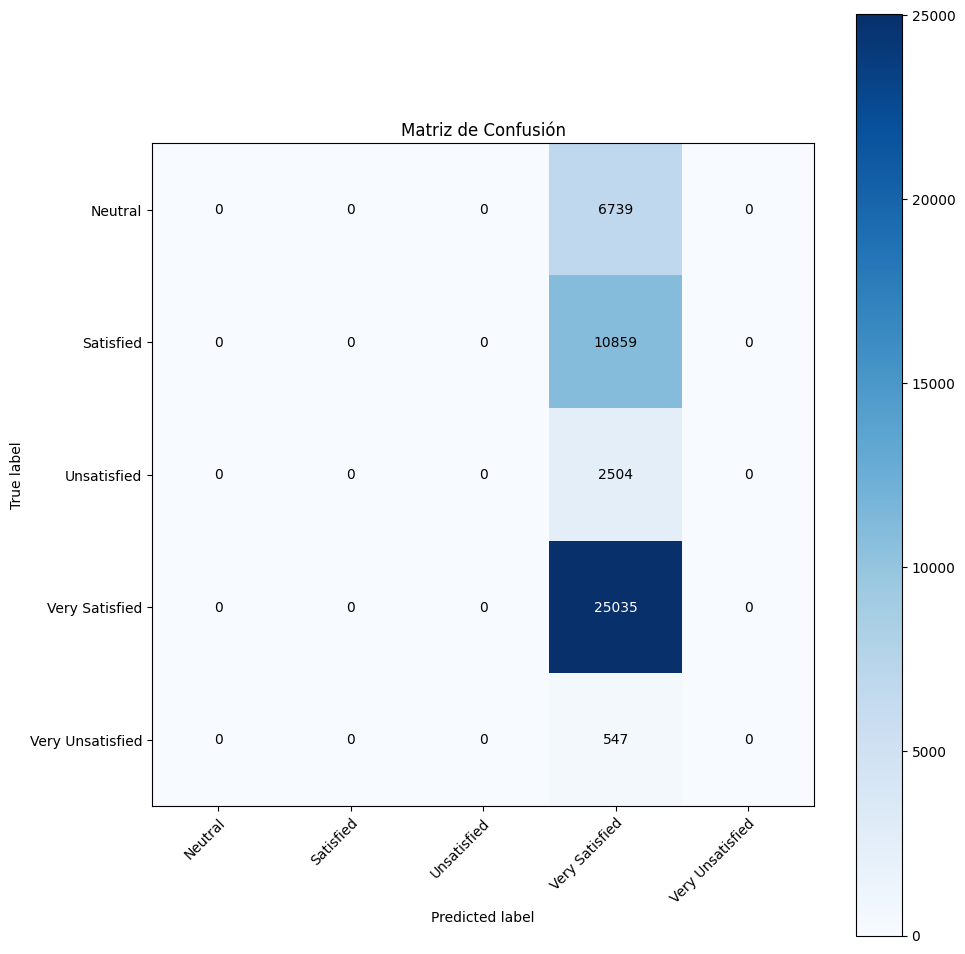

In [56]:
classes = rfc_bm_pipe[1].classes_
plot_confusion_matrix(y_true=Y_train, y_pred=y_pred_rfc_bm, classes=classes,
                      title='Matriz de Confusión')

In [57]:
report_rfc_bm = classification_report(Y_train, y_pred_rfc_bm)
print("Train Report\n", report_rfc_bm)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Report
                   precision    recall  f1-score   support

         Neutral       0.00      0.00      0.00      6739
       Satisfied       0.00      0.00      0.00     10859
     Unsatisfied       0.00      0.00      0.00      2504
  Very Satisfied       0.55      1.00      0.71     25035
Very Unsatisfied       0.00      0.00      0.00       547

        accuracy                           0.55     45684
       macro avg       0.11      0.20      0.14     45684
    weighted avg       0.30      0.55      0.39     45684



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
y_pred_val_rfc_bm = rfc_bm_pipe.predict(X_val)
y_pred_val_rfc_bm

array(['Very Satisfied', 'Very Satisfied', 'Very Satisfied', ...,
       'Very Satisfied', 'Very Satisfied', 'Very Satisfied'], dtype=object)

Confusion matrix, without normalization


<Axes: title={'center': 'Matriz de Confusión'}, xlabel='Predicted label', ylabel='True label'>

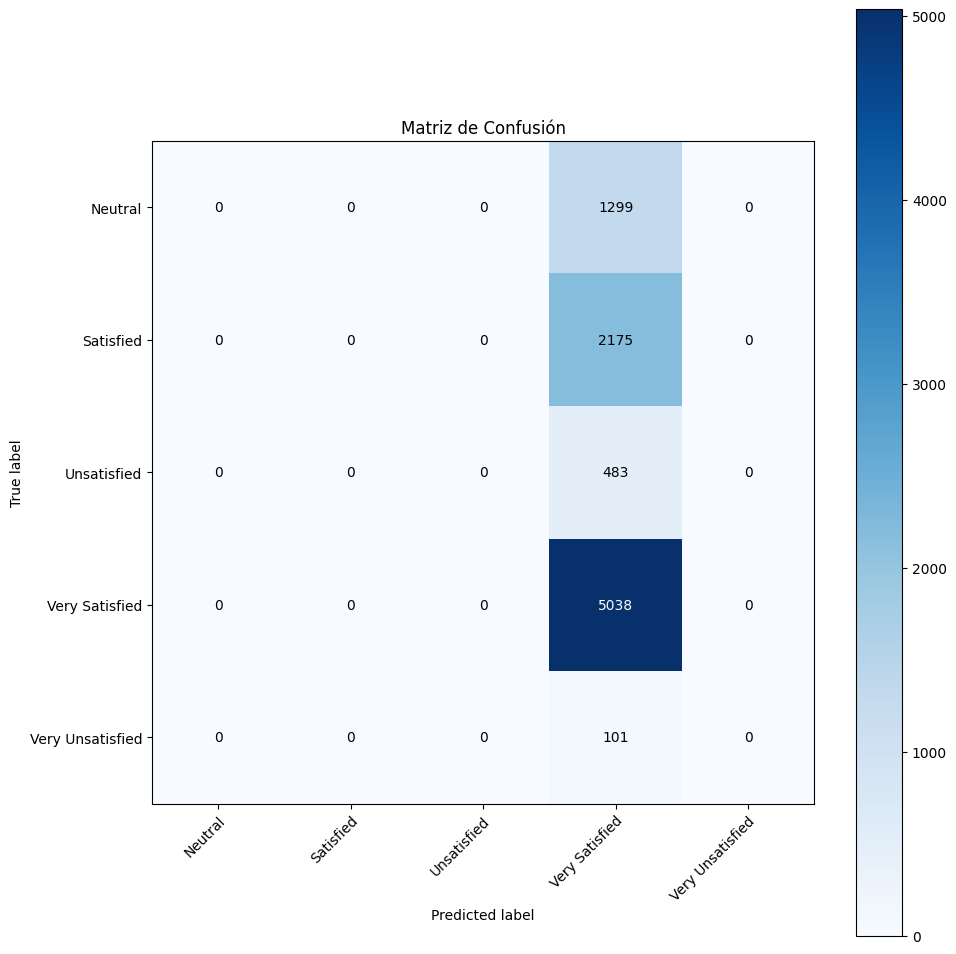

In [59]:
classes = rfc_bm_pipe[1].classes_
plot_confusion_matrix(y_true=Y_val, y_pred=y_pred_val_rfc_bm, classes=classes,
                      title='Matriz de Confusión')

In [60]:
report_rfc_bm = classification_report(Y_val, y_pred_val_rfc_bm)
print("Validation Report\n", report_rfc_bm)

Validation Report
                   precision    recall  f1-score   support

         Neutral       0.00      0.00      0.00      1299
       Satisfied       0.00      0.00      0.00      2175
     Unsatisfied       0.00      0.00      0.00       483
  Very Satisfied       0.55      1.00      0.71      5038
Very Unsatisfied       0.00      0.00      0.00       101

        accuracy                           0.55      9096
       macro avg       0.11      0.20      0.14      9096
    weighted avg       0.31      0.55      0.39      9096



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 3.3.2. Modelo experimental.

#### 3.3.2.1. Implementación.

Como pudimos observar, al ser pocos árboles y poca profundidad, las métricas no fueron buenas. Ahora vamos a probar con un nuevo modelo:

In [61]:
%%time
estimators_rfc_em1 = [
        ('transform', preprocessor),
        ('classifier', RandomForestClassifier(n_estimators=100, random_state=my_seed))
]

rfc_em1_pipe = Pipeline(estimators_rfc_em1)
rfc_em1_pipe.fit(X_train, Y_train)

CPU times: user 13 s, sys: 213 ms, total: 13.2 s
Wall time: 13.3 s


Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('transform',
                                                                   FunctionTransformer(func=<function fix_num_values at 0x7b1e11228040>))]),
                                                  ['accommodates', 'bathrooms',
                                                   'bedrooms', 'beds',
                                                   'cleaning_fee',
                                                   'host_has_profile_pic',
                                                   'host_identity_verified',
                                                   'host_response_rate',
                                                   'host_since', 'last_review',
                                                   'latitude', 'log_price',
                                                   'longitude',
                                                   'number_of_reviews']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   FunctionTransformer(func=<function fix_cat_values at 0x7b1e11228430>)),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['property_type', 'room_type',
                                                   'bed_type',
                                                   'cancellation_policy'])])),
                ('classifier', RandomForestClassifier(random_state=19))])

#### 3.3.2.2. Evaluación.

In [62]:
y_pred_rfc_em1 = rfc_em1_pipe.predict(X_train)
y_pred_rfc_em1

array(['Very Satisfied', 'Very Satisfied', 'Very Satisfied', ...,
       'Satisfied', 'Satisfied', 'Very Unsatisfied'], dtype=object)

Confusion matrix, without normalization


<Axes: title={'center': 'Matriz de Confusión'}, xlabel='Predicted label', ylabel='True label'>

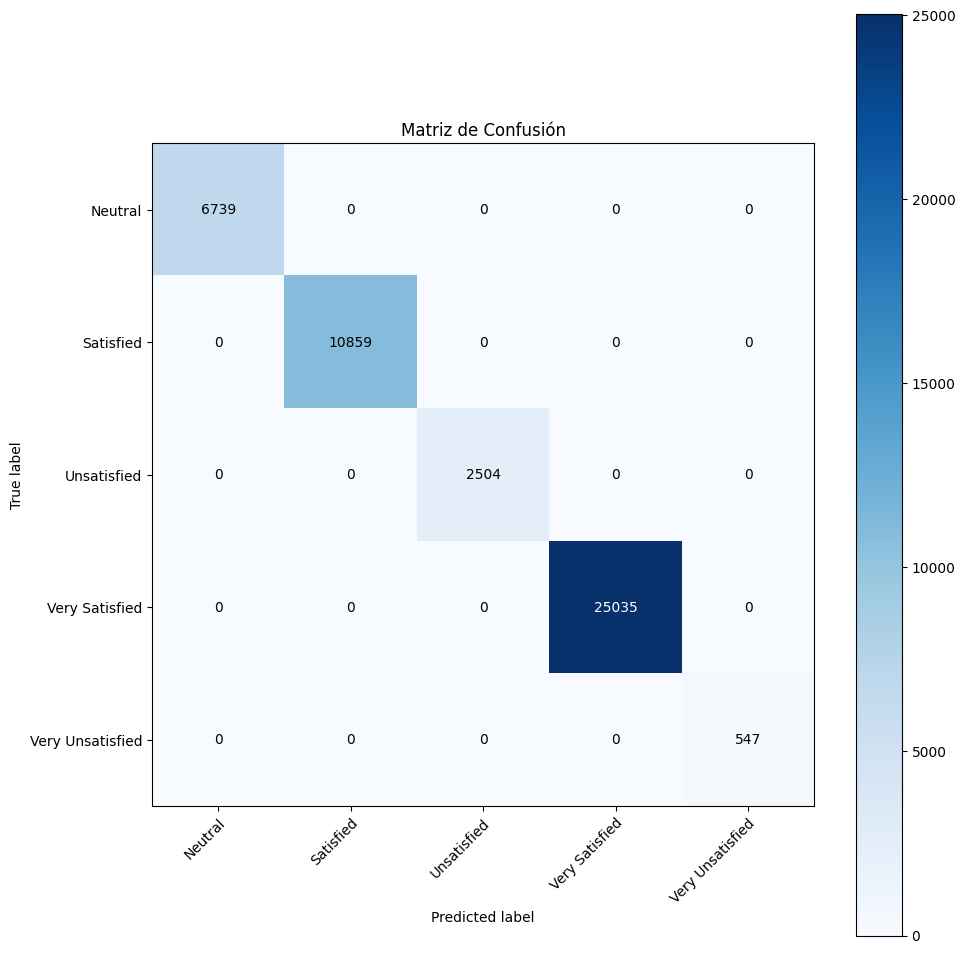

In [63]:
classes = rfc_em1_pipe[1].classes_
plot_confusion_matrix(y_true=Y_train, y_pred=y_pred_rfc_em1, classes=classes,
                      title='Matriz de Confusión')

In [64]:
report_rfc_em1 = classification_report(Y_train, y_pred_rfc_em1)
print("Train Report\n", report_rfc_em1)

Train Report
                   precision    recall  f1-score   support

         Neutral       1.00      1.00      1.00      6739
       Satisfied       1.00      1.00      1.00     10859
     Unsatisfied       1.00      1.00      1.00      2504
  Very Satisfied       1.00      1.00      1.00     25035
Very Unsatisfied       1.00      1.00      1.00       547

        accuracy                           1.00     45684
       macro avg       1.00      1.00      1.00     45684
    weighted avg       1.00      1.00      1.00     45684



Hacemos lo mismo para validación:

In [65]:
y_pred_val_rfc_em1 = rfc_em1_pipe.predict(X_val)
y_pred_val_rfc_em1

array(['Neutral', 'Very Satisfied', 'Neutral', ..., 'Very Satisfied',
       'Very Satisfied', 'Neutral'], dtype=object)

Confusion matrix, without normalization


<Axes: title={'center': 'Matriz de Confusión'}, xlabel='Predicted label', ylabel='True label'>

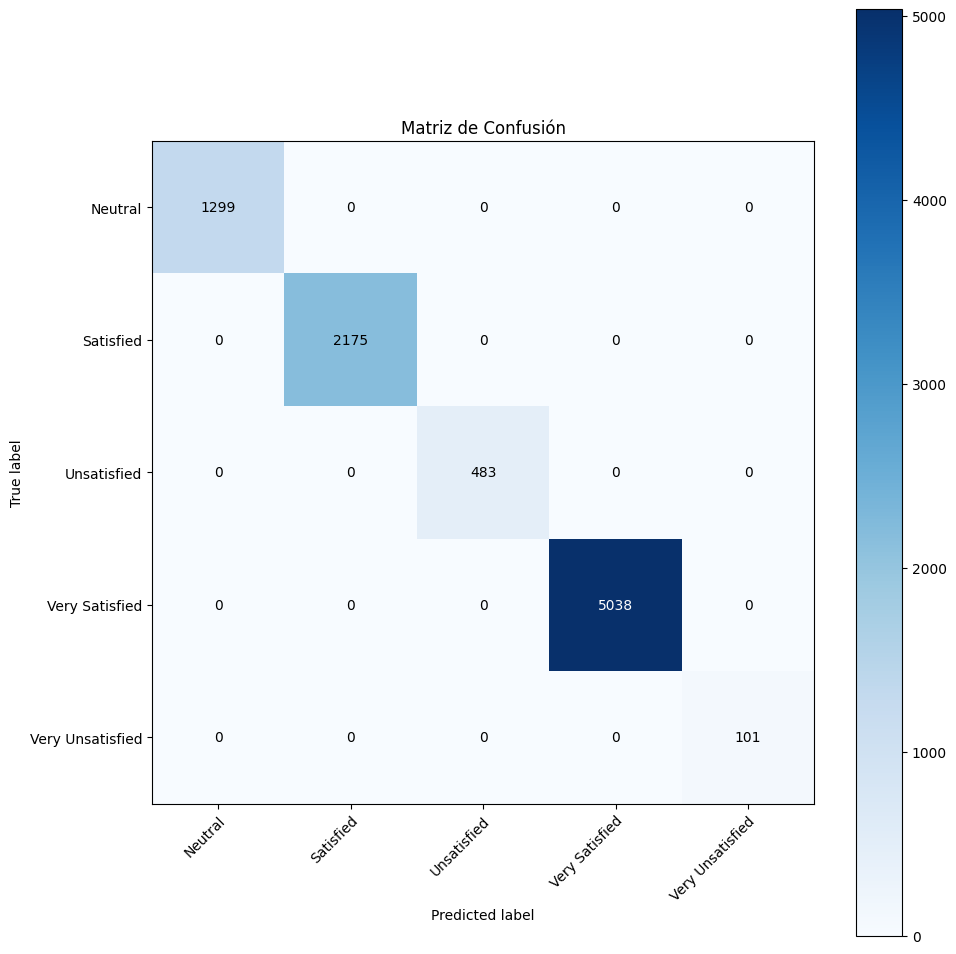

In [66]:
classes = rfc_em1_pipe[1].classes_
plot_confusion_matrix(y_true=Y_val, y_pred=y_pred_val_rfc_em1, classes=classes,
                      title='Matriz de Confusión')

In [67]:
report_rfc_em1 = classification_report(Y_val, y_pred_val_rfc_em1)
print("Val Report\n", report_rfc_em1)

Val Report
                   precision    recall  f1-score   support

         Neutral       1.00      1.00      1.00      1299
       Satisfied       1.00      1.00      1.00      2175
     Unsatisfied       1.00      1.00      1.00       483
  Very Satisfied       1.00      1.00      1.00      5038
Very Unsatisfied       1.00      1.00      1.00       101

        accuracy                           1.00      9096
       macro avg       1.00      1.00      1.00      9096
    weighted avg       1.00      1.00      1.00      9096



El uso de la importancia de las características permite evaluar la relevancia de las variables en el modelo, acá podemos :

In [68]:
importance_threshold = 0.01

feature_importances = rfc_em1_pipe[1].feature_importances_
to_drop  = [num_column_names[i] for i in range(len(num_column_names)) if feature_importances[i] < importance_threshold]
to_drop

['host_has_profile_pic', 'host_since', 'last_review']

Con el modelo anterior y eliminando las variables sugeridas, ¿mejora el modelo?.

### 3.3.3. Búsqueda de hiperparámetros.

#### 3.3.3.1. Implementación.

In [69]:
rfc_estimators = [
    ('transform', preprocessor),
    ("scaler", StandardScaler()),
    ('classifier', RandomForestClassifier())
    #('classifier', RandomForestClassifier(class_weight="balanced_subsample"))
]

rfc_hip_pipe = Pipeline(rfc_estimators)

# n_estimators: Número de árboles
# max_depth: Profundidad máxima de cada árbol
# min_samples_split: Número mínimo de muestras en una partición. Toma 2 cuando no es especificado.
# min_samples_leaf: Número mínimo de muestras en cada nodo. Toma 1 cuando no es especificado.
# bootstrap: Método de selección de muestras, si es False utiliza todo el conjunto de datos. Toma el valor True si no es especificado.
# class_weight: Toma valores ['balanced', 'balanced_subsample']. Toma el valor None si no es especificado y debería ser usado si las clases tienen el mismo peso
# criterion: Mide la calidad de cada árbol de decisión. Toma el valor gini si no es especificado.
parameters = {
    'scaler': [StandardScaler(), MinMaxScaler(), 'passthrough'],
    'classifier__n_estimators': [80, 100],
    'classifier__max_depth': [None, 10]
    #'classifier__criterion': ['gini', 'entropy', 'log_loss']
}

grid_search_rfc = GridSearchCV(rfc_hip_pipe, parameters, verbose=2, scoring='precision_macro', cv=5, n_jobs=-1)

In [70]:
%%time
start_time = timer(None)
grid_search_rfc.fit(X_train, Y_train)
timer(start_time)

Fitting 5 folds for each of 12 candidates, totalling 60 fits

 Time taken: 0 hours 7 minutes and 48.4 seconds.
CPU times: user 14.4 s, sys: 1.24 s, total: 15.6 s
Wall time: 7min 48s


In [71]:
best_model_rfc = grid_search_rfc.best_estimator_
pd.DataFrame(grid_search_rfc.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__max_depth,param_classifier__n_estimators,param_scaler,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,15.931086,0.943380,1.970067,0.383325,None,80,StandardScaler(),"{'classifier__max_depth': None, 'classifier__n...",0.385449,0.357975,0.398209,0.390246,0.423799,0.391136,0.021212,6
1,15.076765,0.081696,1.654718,0.034387,None,80,MinMaxScaler(),"{'classifier__max_depth': None, 'classifier__n...",0.449359,0.337633,0.407171,0.344486,0.458899,0.399510,0.050847,4
2,15.005146,0.370112,2.192036,0.341116,None,80,passthrough,"{'classifier__max_depth': None, 'classifier__n...",0.357025,0.369187,0.385166,0.335830,0.374945,0.364431,0.016947,12
3,17.304808,0.589278,2.005022,0.401893,None,100,StandardScaler(),"{'classifier__max_depth': None, 'classifier__n...",0.410352,0.362014,0.421587,0.363378,0.469836,0.405433,0.040216,2
4,16.949317,0.445742,1.934135,0.389839,None,100,MinMaxScaler(),"{'classifier__max_depth': None, 'classifier__n...",0.359831,0.344749,0.383980,0.348874,0.427874,0.373062,0.030611,9
5,18.163075,1.232267,1.900049,0.301271,None,100,passthrough,"{'classifier__max_depth': None, 'classifier__n...",0.376238,0.331947,0.398840,0.341675,0.403159,0.370372,0.029051,11
6,10.241198,0.411887,1.589858,0.348319,10,80,StandardScaler(),"{'classifier__max_depth': 10, 'classifier__n_e...",0.389876,0.429874,0.288203,0.531466,0.312545,0.390393,0.087136,7
7,9.693527,0.739902,1.689707,0.415216,10,80,MinMaxScaler(),"{'classifier__max_depth': 10, 'classifier__n_e...",0.420114,0.392457,0.275741,0.519283,0.410095,0.403538,0.077678,3
8,9.938025,0.523439,1.580361,0.380403,10,80,passthrough,"{'classifier__max_depth': 10, 'classifier__n_e...",0.441506,0.312410,0.276825,0.533708,0.304809,0.373852,0.098069,8
9,11.016080,0.640420,1.453972,0.096741,10,100,StandardScaler(),"{'classifier__max_depth': 10, 'classifier__n_e...",0.436287,0.389019,0.309015,0.524183,0.297796,0.391260,0.083906,5


In [72]:
grid_search_rfc.best_params_

{'classifier__max_depth': 10,
 'classifier__n_estimators': 100,
 'scaler': 'passthrough'}

#### 3.3.3.2. Evaluación.

In [73]:
y_pred_rfc_hip = best_model_rfc.predict(X_train)
y_pred_rfc_hip

array(['Very Satisfied', 'Very Satisfied', 'Very Satisfied', ...,
       'Very Satisfied', 'Very Satisfied', 'Very Satisfied'], dtype=object)

Confusion matrix, without normalization


<Axes: title={'center': 'Matriz de Confusión'}, xlabel='Predicted label', ylabel='True label'>

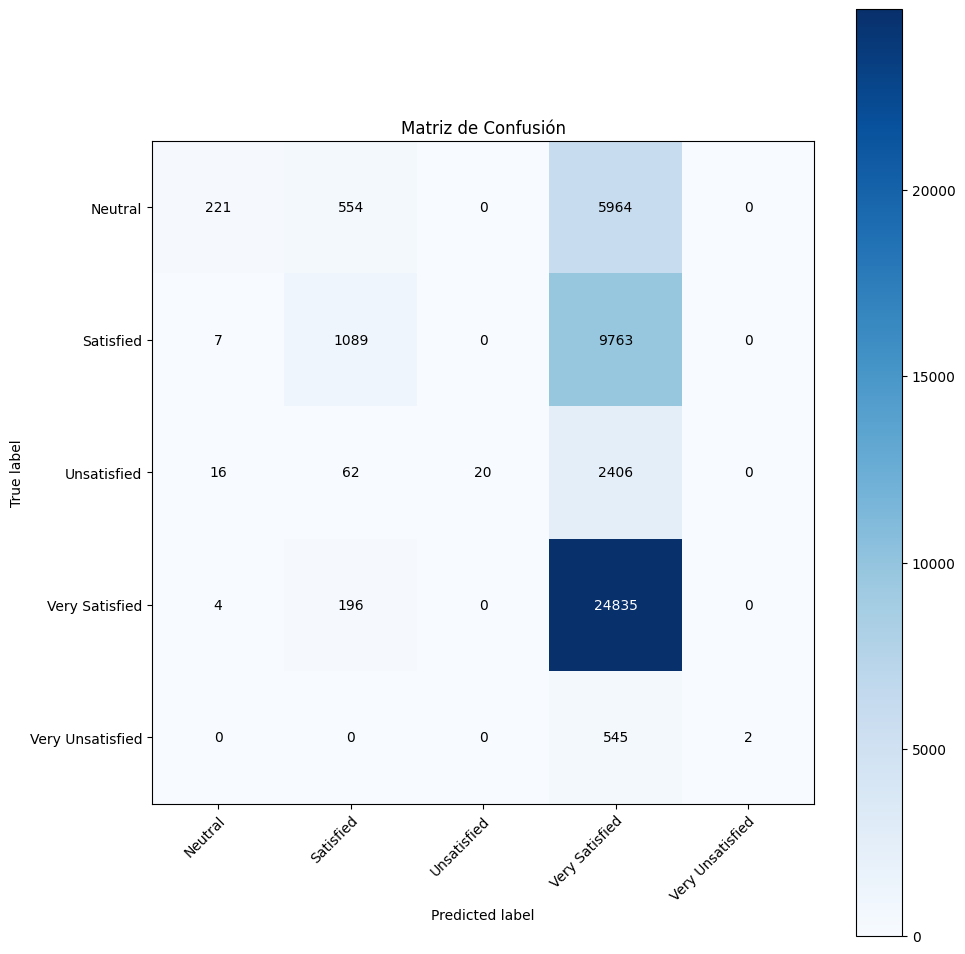

In [74]:
classes = best_model_rfc.classes_
plot_confusion_matrix(y_true=Y_train, y_pred=y_pred_rfc_hip, classes=classes,
                      title='Matriz de Confusión')

In [75]:
report_rfc_hip = classification_report(Y_train, y_pred_rfc_hip)
print("Train Report\n", report_rfc_bm)

Train Report
                   precision    recall  f1-score   support

         Neutral       0.00      0.00      0.00      1299
       Satisfied       0.00      0.00      0.00      2175
     Unsatisfied       0.00      0.00      0.00       483
  Very Satisfied       0.55      1.00      0.71      5038
Very Unsatisfied       0.00      0.00      0.00       101

        accuracy                           0.55      9096
       macro avg       0.11      0.20      0.14      9096
    weighted avg       0.31      0.55      0.39      9096



In [76]:
y_pred_val_rfc_hip = best_model_rfc.predict(X_val)
y_pred_val_rfc_hip

array(['Very Satisfied', 'Very Satisfied', 'Satisfied', ...,
       'Very Satisfied', 'Very Satisfied', 'Very Satisfied'], dtype=object)

### 3.3.4. Despliegue.

In [77]:
y_pred_test_rfc_hip = best_model_rfc.predict(X_test)
y_pred_test_rfc_hip

array(['Satisfied', 'Very Satisfied', 'Very Satisfied', ...,
       'Very Satisfied', 'Very Satisfied', 'Very Satisfied'], dtype=object)

Confusion matrix, without normalization


<Axes: title={'center': 'Matriz de Confusión'}, xlabel='Predicted label', ylabel='True label'>

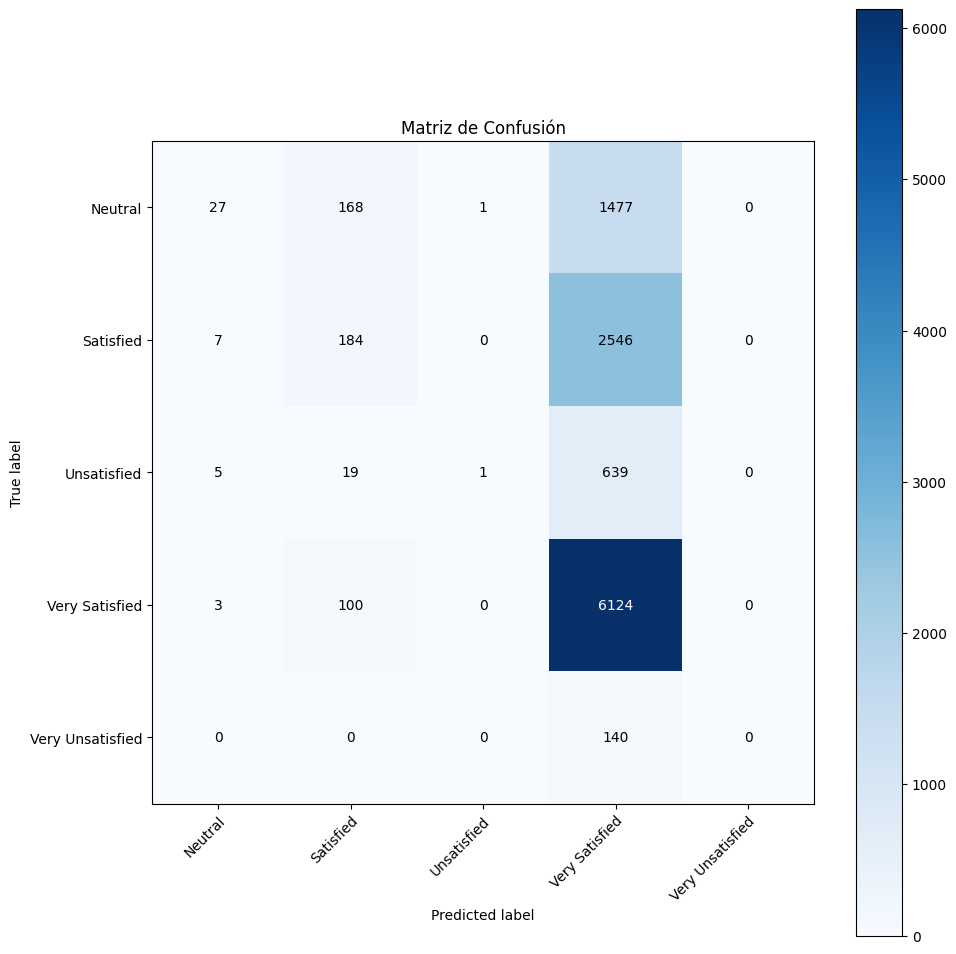

In [78]:
classes = best_model_rfc.classes_
plot_confusion_matrix(y_true=Y_test, y_pred=y_pred_test_rfc_hip, classes=classes,
                      title='Matriz de Confusión')

In [79]:
report_rfc_bm = classification_report(Y_test, y_pred_test_rfc_hip)
print("Test Report\n", report_rfc_bm)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Report
                   precision    recall  f1-score   support

         Neutral       0.64      0.02      0.03      1673
       Satisfied       0.39      0.07      0.11      2737
     Unsatisfied       0.50      0.00      0.00       664
  Very Satisfied       0.56      0.98      0.71      6227
Very Unsatisfied       0.00      0.00      0.00       140

        accuracy                           0.55     11441
       macro avg       0.42      0.21      0.17     11441
    weighted avg       0.52      0.55      0.42     11441



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


¿La profundidad afecta?, ¿qué pasaría si buscamos otros hiperparámetros?. ¿Qué pasaría si usamos class_weight directamente?. ¿Dejamos pasar por alto outliers?. ¿Será realmente necesario estandarizar los datos?

##3.4. SVC

### 3.4.1. Modelo base.

#### 3.4.1.1. Implementación.

In [80]:
%%time
estimators_svc_bm = [
        ('transform', preprocessor),
        ('classifier', SVC())
]

svc_bm_pipe = Pipeline(estimators_svc_bm)
start_time = timer(None)
svc_bm_pipe.fit(X_train, Y_train)
timer(start_time)


 Time taken: 0 hours 2 minutes and 56.43 seconds.
CPU times: user 2min 54s, sys: 1.28 s, total: 2min 55s
Wall time: 2min 56s


#### 3.4.1.2. Evaluación.

In [81]:
y_pred_svc_bm = svc_bm_pipe.predict(X_train)
y_pred_svc_bm

array(['Very Satisfied', 'Very Satisfied', 'Very Satisfied', ...,
       'Very Satisfied', 'Very Satisfied', 'Very Satisfied'], dtype=object)

Confusion matrix, without normalization


<Axes: title={'center': 'Matriz de Confusión'}, xlabel='Predicted label', ylabel='True label'>

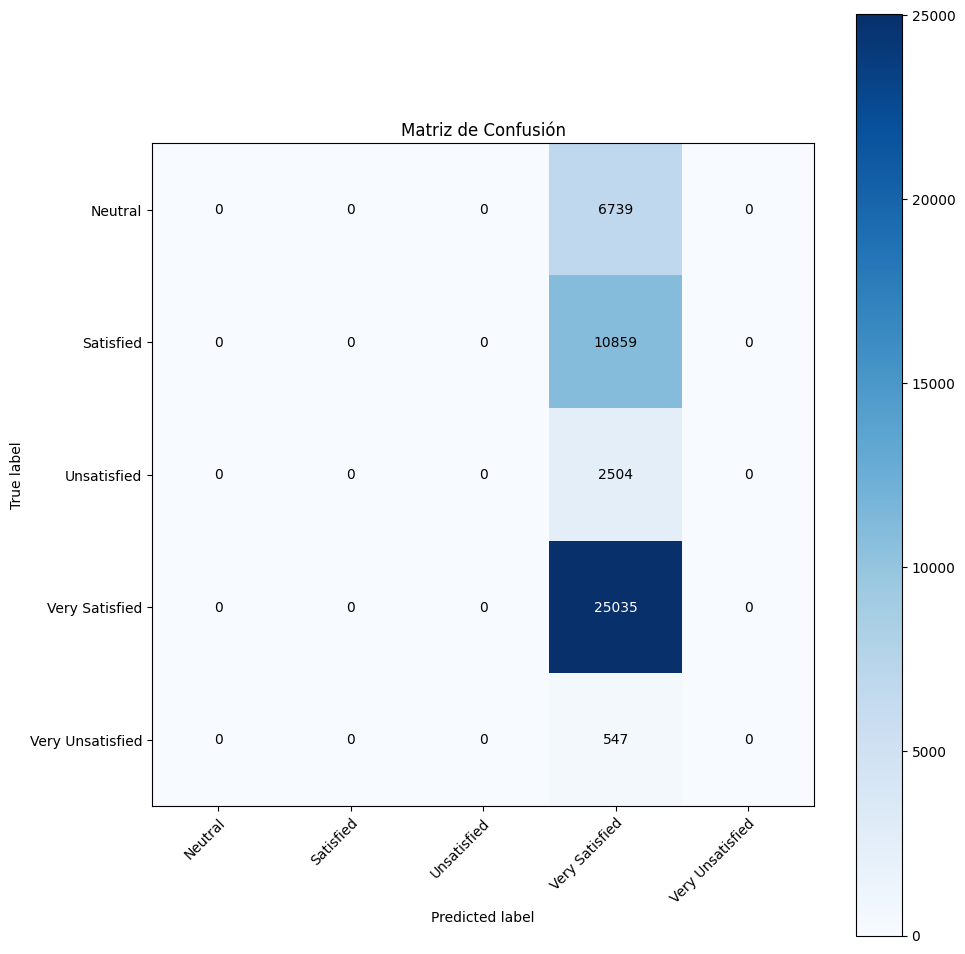

In [82]:
classes = svc_bm_pipe[1].classes_
plot_confusion_matrix(y_true=Y_train, y_pred=y_pred_svc_bm, classes=classes,
                      title='Matriz de Confusión')

In [83]:
report_rfc_bm = classification_report(Y_train, y_pred_svc_bm)
print("Train Report\n", report_rfc_bm)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Report
                   precision    recall  f1-score   support

         Neutral       0.00      0.00      0.00      6739
       Satisfied       0.00      0.00      0.00     10859
     Unsatisfied       0.00      0.00      0.00      2504
  Very Satisfied       0.55      1.00      0.71     25035
Very Unsatisfied       0.00      0.00      0.00       547

        accuracy                           0.55     45684
       macro avg       0.11      0.20      0.14     45684
    weighted avg       0.30      0.55      0.39     45684



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Verificamos con datos de validación

In [84]:
y_pred_val_svc_bm = svc_bm_pipe.predict(X_val)
y_pred_val_svc_bm

array(['Very Satisfied', 'Very Satisfied', 'Very Satisfied', ...,
       'Very Satisfied', 'Very Satisfied', 'Very Satisfied'], dtype=object)

Confusion matrix, without normalization


<Axes: title={'center': 'Matriz de Confusión'}, xlabel='Predicted label', ylabel='True label'>

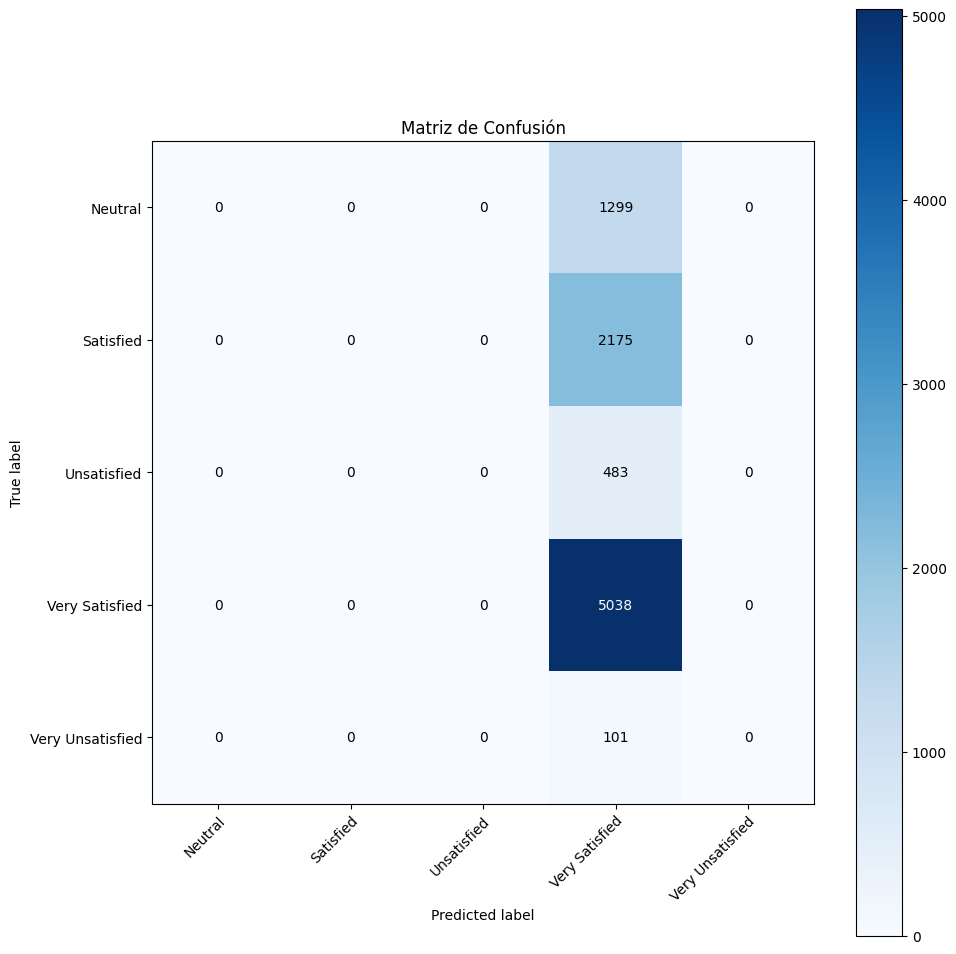

In [85]:
classes = svc_bm_pipe[1].classes_
plot_confusion_matrix(y_true=Y_val, y_pred=y_pred_val_svc_bm, classes=classes,
                      title='Matriz de Confusión')

In [86]:
report_svc_bm = classification_report(Y_train, y_pred_rfc_bm)
print("Validation Report\n", report_rfc_bm)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Report
                   precision    recall  f1-score   support

         Neutral       0.00      0.00      0.00      6739
       Satisfied       0.00      0.00      0.00     10859
     Unsatisfied       0.00      0.00      0.00      2504
  Very Satisfied       0.55      1.00      0.71     25035
Very Unsatisfied       0.00      0.00      0.00       547

        accuracy                           0.55     45684
       macro avg       0.11      0.20      0.14     45684
    weighted avg       0.30      0.55      0.39     45684



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 3.4.2. Modelo experimental.

#### 3.4.1.1. Implementación.

In [87]:
%%time
estimators_svc_em1 = [
        ('transform', preprocessor),
        ('classifier', SVC(kernel='poly'))
]

svc_em1_pipe = Pipeline(estimators_svc_em1)
start_time = timer(None)
svc_em1_pipe.fit(X_train, Y_train)
timer(start_time)


 Time taken: 0 hours 2 minutes and 26.67 seconds.
CPU times: user 2min 23s, sys: 1.48 s, total: 2min 25s
Wall time: 2min 26s


#### 3.4.2.2. Evaluación.

In [88]:
y_pred_svc_em1 = svc_em1_pipe.predict(X_train)
y_pred_svc_em1

array(['Very Satisfied', 'Very Satisfied', 'Very Satisfied', ...,
       'Very Satisfied', 'Very Satisfied', 'Very Satisfied'], dtype=object)

Confusion matrix, without normalization


<Axes: title={'center': 'Matriz de Confusión'}, xlabel='Predicted label', ylabel='True label'>

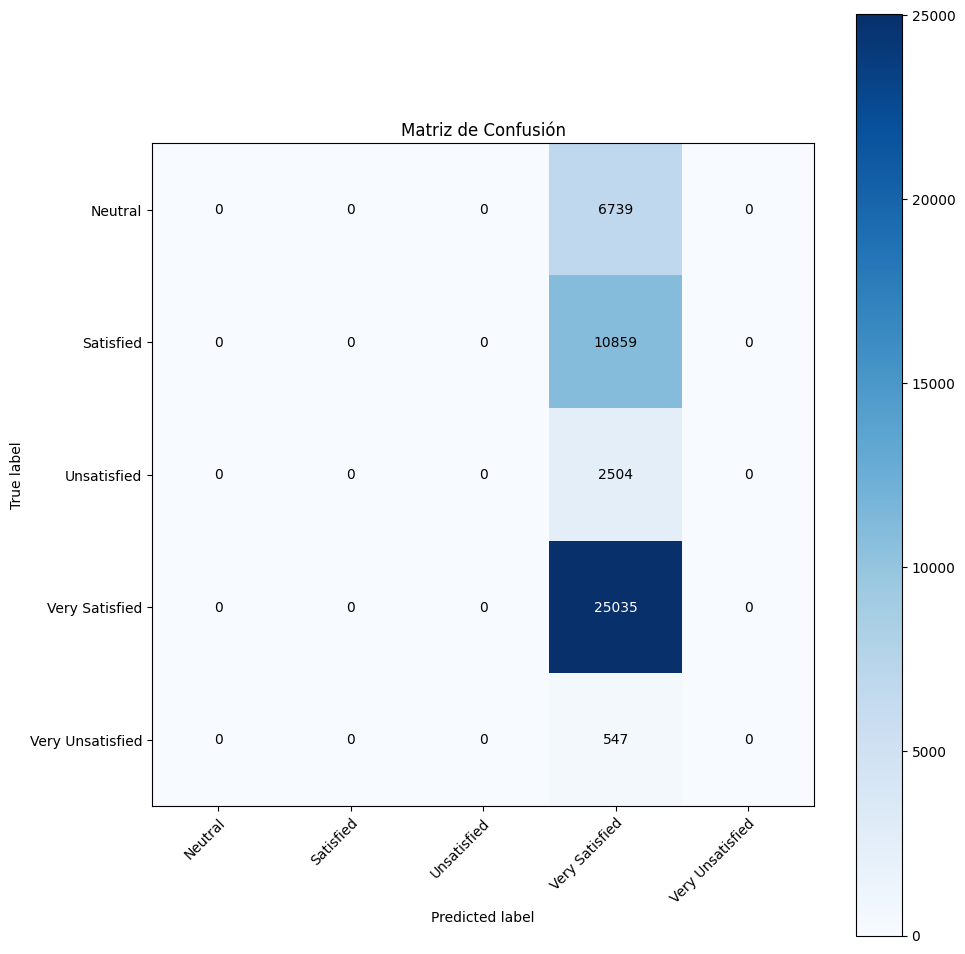

In [89]:
classes = svc_em1_pipe[1].classes_
plot_confusion_matrix(y_true=Y_train, y_pred=y_pred_svc_em1, classes=classes,
                      title='Matriz de Confusión')

In [90]:
report_svc_em1 = classification_report(Y_train, y_pred_svc_em1)
print("Train Report\n", report_rfc_bm)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Report
                   precision    recall  f1-score   support

         Neutral       0.00      0.00      0.00      6739
       Satisfied       0.00      0.00      0.00     10859
     Unsatisfied       0.00      0.00      0.00      2504
  Very Satisfied       0.55      1.00      0.71     25035
Very Unsatisfied       0.00      0.00      0.00       547

        accuracy                           0.55     45684
       macro avg       0.11      0.20      0.14     45684
    weighted avg       0.30      0.55      0.39     45684



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [91]:
y_pred_val_svc_em1 = svc_em1_pipe.predict(X_val)
y_pred_val_svc_em1

array(['Very Satisfied', 'Very Satisfied', 'Very Satisfied', ...,
       'Very Satisfied', 'Very Satisfied', 'Very Satisfied'], dtype=object)

Confusion matrix, without normalization


<Axes: title={'center': 'Matriz de Confusión'}, xlabel='Predicted label', ylabel='True label'>

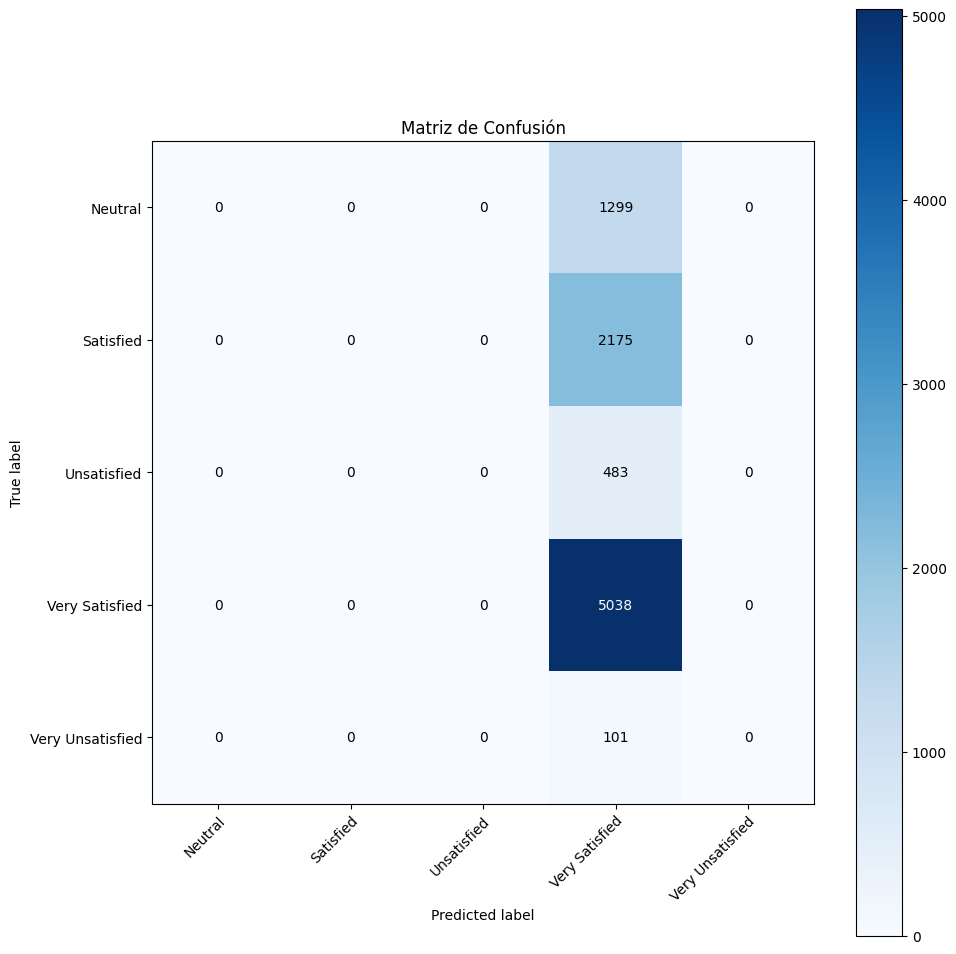

In [92]:
classes = svc_em1_pipe[1].classes_
plot_confusion_matrix(y_true=Y_val, y_pred=y_pred_val_svc_em1, classes=classes,
                      title='Matriz de Confusión')

In [93]:
report_svc_em1 = classification_report(Y_val, y_pred_val_svc_em1)
print("Train Report\n", report_rfc_bm)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Report
                   precision    recall  f1-score   support

         Neutral       0.00      0.00      0.00      6739
       Satisfied       0.00      0.00      0.00     10859
     Unsatisfied       0.00      0.00      0.00      2504
  Very Satisfied       0.55      1.00      0.71     25035
Very Unsatisfied       0.00      0.00      0.00       547

        accuracy                           0.55     45684
       macro avg       0.11      0.20      0.14     45684
    weighted avg       0.30      0.55      0.39     45684



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 3.4.3. Búsqueda de hiperparámetros.

#### 3.4.3.1. Implementación.

In [94]:
svc_estimators = [
    ('transform', preprocessor),
    #("scaler", StandardScaler()),
    ('classifier', SVC(class_weight="balanced"))
]

svc_hip_pipe = Pipeline(svc_estimators)


# C: Parámetro de regularización
# kernel: tipo a usar en el modelo, puede tomar valores ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']. Toma el valor rbf si no es especificado.
# degree: Grado del polinomio. Debe ser positivo es ignorado el valor por otros kernel
parameters = {
    #'scaler': [StandardScaler(), 'passthrough'],
    'classifier__kernel': ['poly', 'rbf']
    #'classifier__C': [1, 3]
}

grid_search_svc = GridSearchCV(svc_hip_pipe, parameters, verbose=2, scoring='precision_macro', cv=5, n_jobs=-1)

In [95]:
%%time
start_time = timer(None)
grid_search_svc.fit(X_train, Y_train)
timer(start_time)

Fitting 5 folds for each of 2 candidates, totalling 10 fits

 Time taken: 0 hours 58 minutes and 30.79 seconds.
CPU times: user 8min 41s, sys: 7.64 s, total: 8min 48s
Wall time: 58min 30s


In [96]:
best_model_svc = grid_search_svc.best_estimator_
pd.DataFrame(grid_search_svc.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,512.923245,6.188474,34.552614,0.682794,poly,{'classifier__kernel': 'poly'},0.010966,0.010966,0.010945,0.010966,0.077003,0.024169,0.026417,1
1,585.090695,13.993539,57.720078,11.441806,rbf,{'classifier__kernel': 'rbf'},0.010966,0.010966,0.010945,0.010966,0.047548,0.018278,0.014635,2


In [97]:
grid_search_svc.best_params_

{'classifier__kernel': 'poly'}

#### 3.4.3.2. Evaluación.

In [98]:
y_pred_svc_hip = best_model_svc.predict(X_train)
y_pred_svc_hip

array(['Very Unsatisfied', 'Very Unsatisfied', 'Satisfied', ...,
       'Satisfied', 'Very Unsatisfied', 'Very Unsatisfied'], dtype=object)

Confusion matrix, without normalization


<Axes: title={'center': 'Matriz de Confusión'}, xlabel='Predicted label', ylabel='True label'>

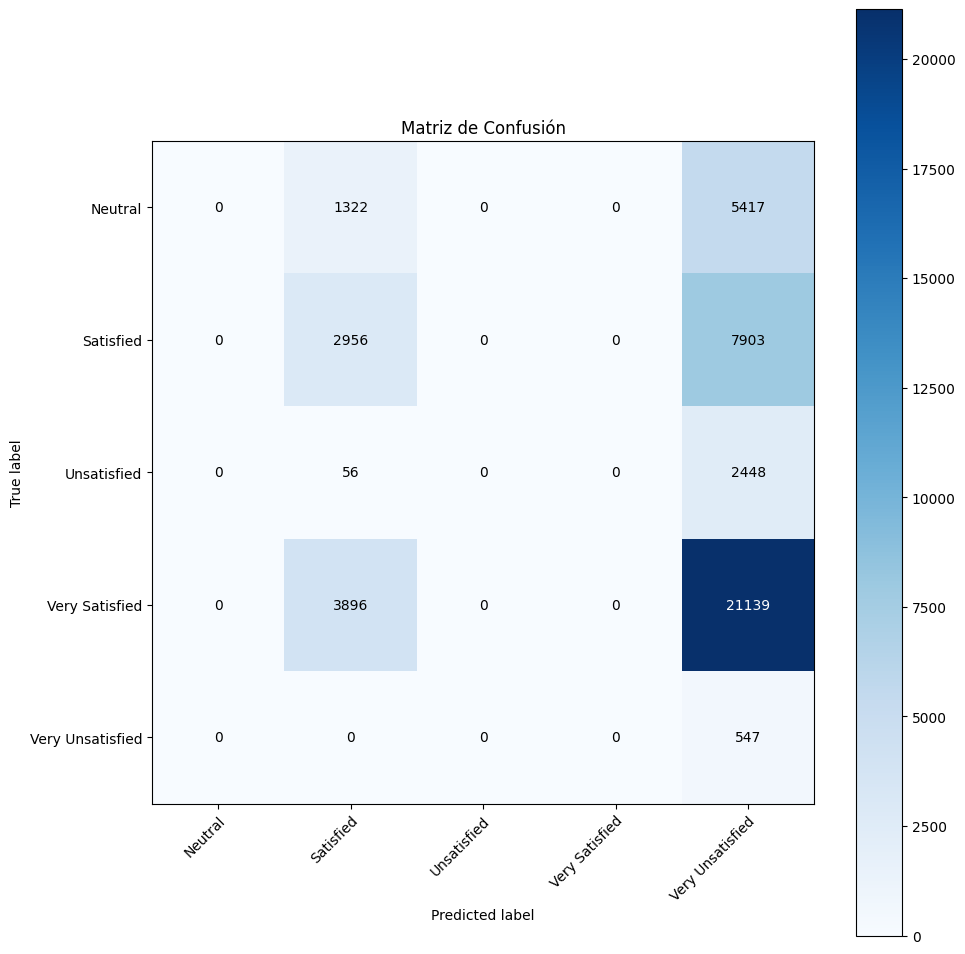

In [99]:
classes = best_model_svc.classes_
plot_confusion_matrix(y_true=Y_train, y_pred=y_pred_svc_hip, classes=classes,
                      title='Matriz de Confusión')

In [100]:
report_svc_hip = classification_report(Y_train, y_pred_svc_hip)
print("Train Report\n", report_svc_hip)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Report
                   precision    recall  f1-score   support

         Neutral       0.00      0.00      0.00      6739
       Satisfied       0.36      0.27      0.31     10859
     Unsatisfied       0.00      0.00      0.00      2504
  Very Satisfied       0.00      0.00      0.00     25035
Very Unsatisfied       0.01      1.00      0.03       547

        accuracy                           0.08     45684
       macro avg       0.07      0.25      0.07     45684
    weighted avg       0.09      0.08      0.07     45684



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [101]:
y_pred_val_svc_hip = best_model_svc.predict(X_val)
y_pred_val_svc_hip

array(['Very Unsatisfied', 'Very Unsatisfied', 'Very Unsatisfied', ...,
       'Very Unsatisfied', 'Very Unsatisfied', 'Very Unsatisfied'],
      dtype=object)

Confusion matrix, without normalization


<Axes: title={'center': 'Matriz de Confusión'}, xlabel='Predicted label', ylabel='True label'>

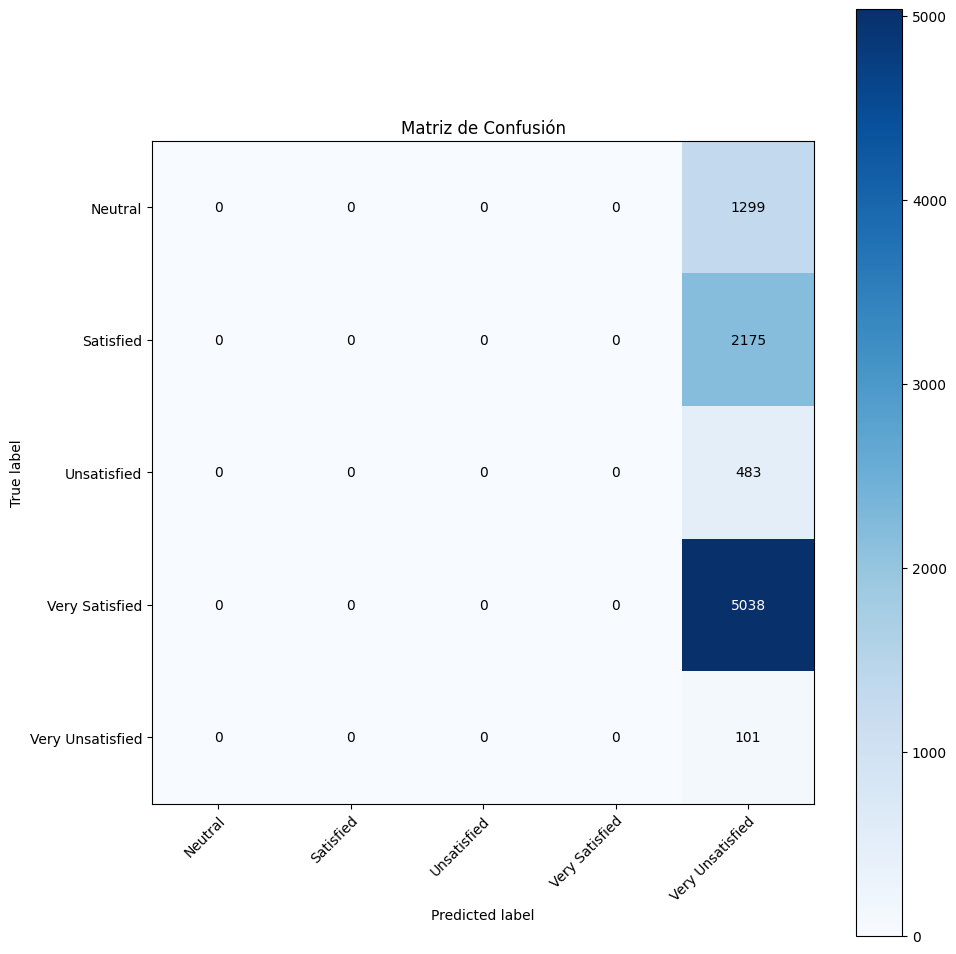

In [102]:
classes = best_model_svc.classes_
plot_confusion_matrix(y_true=Y_val, y_pred=y_pred_val_svc_hip, classes=classes,
                      title='Matriz de Confusión')

In [103]:
report_svc_hip = classification_report(Y_val, y_pred_val_svc_hip)
print("Validation Report\n", report_svc_hip)

Validation Report
                   precision    recall  f1-score   support

         Neutral       0.00      0.00      0.00      1299
       Satisfied       0.00      0.00      0.00      2175
     Unsatisfied       0.00      0.00      0.00       483
  Very Satisfied       0.00      0.00      0.00      5038
Very Unsatisfied       0.01      1.00      0.02       101

        accuracy                           0.01      9096
       macro avg       0.00      0.20      0.00      9096
    weighted avg       0.00      0.01      0.00      9096



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 3.4.4. Despliegue.

In [104]:
y_pred_test_svc_hip = best_model_svc.predict(X_test)
y_pred_test_svc_hip

array(['Very Unsatisfied', 'Very Unsatisfied', 'Very Unsatisfied', ...,
       'Very Unsatisfied', 'Very Unsatisfied', 'Very Unsatisfied'],
      dtype=object)

Confusion matrix, without normalization


<Axes: title={'center': 'Matriz de Confusión'}, xlabel='Predicted label', ylabel='True label'>

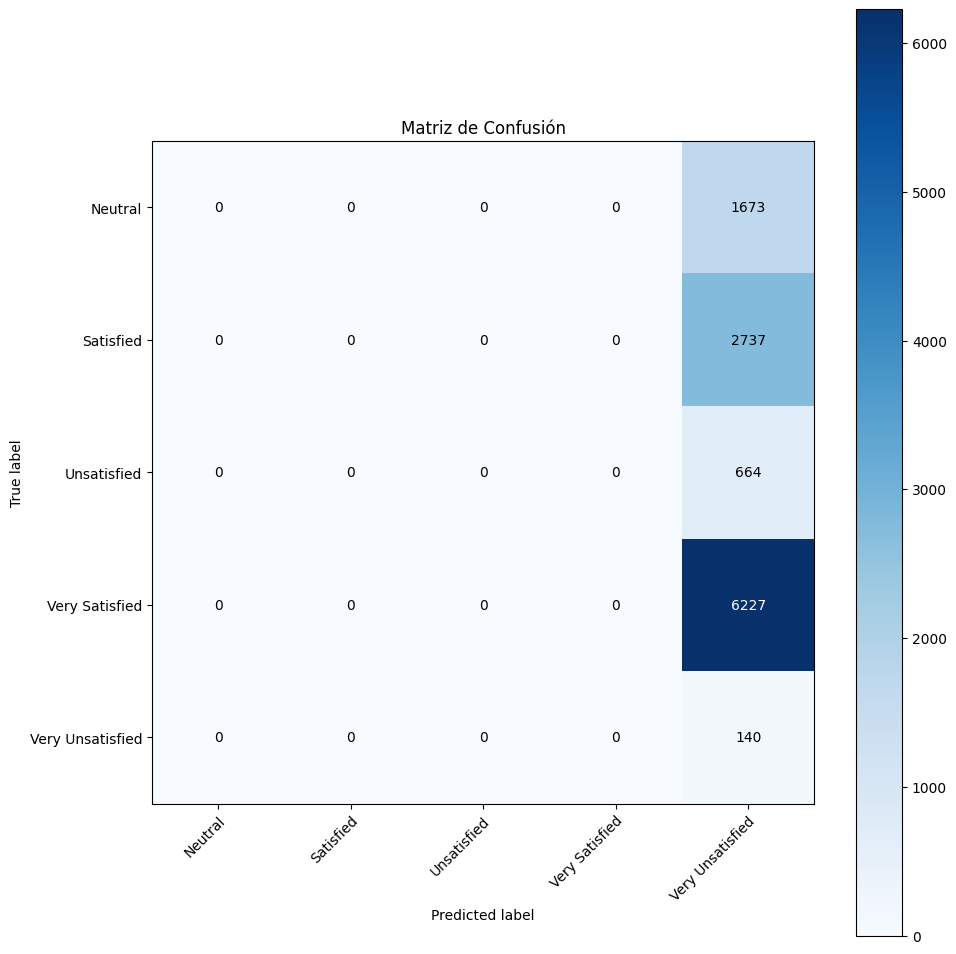

In [105]:
classes = best_model_svc.classes_
plot_confusion_matrix(y_true=Y_test, y_pred=y_pred_test_svc_hip, classes=classes,
                      title='Matriz de Confusión')

In [106]:
report_svc_hip = classification_report(Y_test, y_pred_test_svc_hip)
print("Train Report\n", report_svc_hip)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Report
                   precision    recall  f1-score   support

         Neutral       0.00      0.00      0.00      1673
       Satisfied       0.00      0.00      0.00      2737
     Unsatisfied       0.00      0.00      0.00       664
  Very Satisfied       0.00      0.00      0.00      6227
Very Unsatisfied       0.01      1.00      0.02       140

        accuracy                           0.01     11441
       macro avg       0.00      0.20      0.00     11441
    weighted avg       0.00      0.01      0.00     11441



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


---
# 4. Preguntas

* ¿Qué crees que pasó? ¿Por qué los rendimientos son tan diferentes?
* ¿Hay desbalanceo de datos? ¿Como harías para combatirlo?
* ¿Por qué crees que los rendimientos no son buenos? ¿Tendrá que ver la forma en como entrenamos?, ¿nos falta alguna decisión para el tratamiento de datos?